# Sparse Gaussian Process Posteriors
Mark van der Wilk, 21 September 2021

This should contain plots showing how an inducing point posterior varies if its
variational parameters vary. At some point, this probably should be made into
an animation or something...

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import gpflow
from tools import datasets
from tools import plotting
import abc

2022-12-28 00:27:45.545872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.random.seed(0)
d = datasets.load_data("snelson1d.mat")
# X, Y = (d.X - 3) / 2, d.Y
X, Y = d.X - 3, d.Y

In [3]:
full = gpflow.models.GPR((X, Y), gpflow.kernels.SquaredExponential())
# m = gpflow.models.GPR((X, Y), gpflow.kernels.Polynomial(degree=10.0, variance=0.1))
# m = gpflow.models.GPR((X, Y), PolynomialBasisKernel(6))
# m.likelihood.variance.assign(1e-4)
opt = gpflow.optimizers.Scipy()
opt.minimize(full.training_loss, variables=full.trainable_variables)

2022-12-28 00:27:56.339937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


      fun: 55.90027668938262
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.78557536e-05,  8.12134085e-06,  3.35067206e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 17
      nit: 11
     njev: 17
   status: 0
  success: True
        x: array([-0.16871698,  0.14666368, -2.49007416])

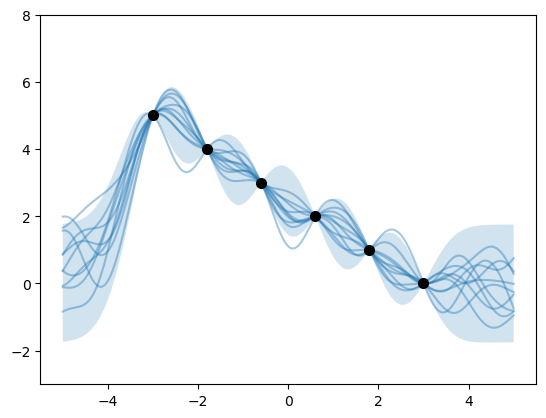

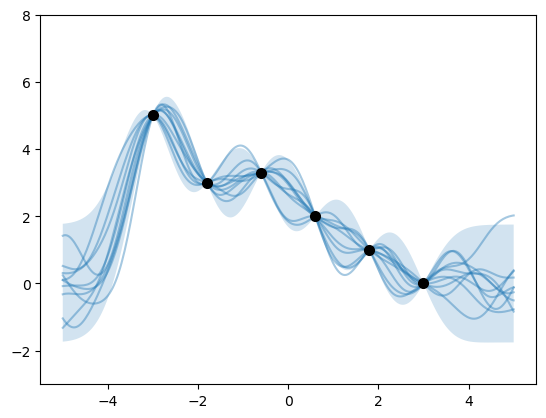

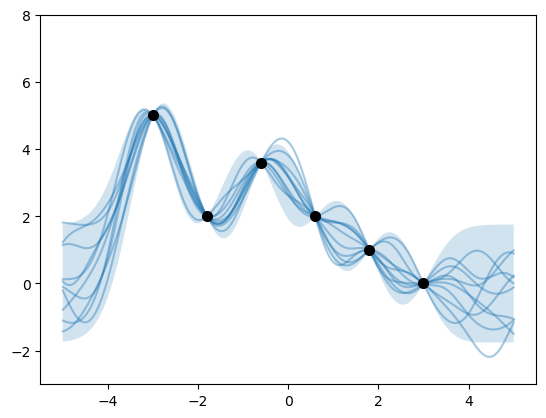

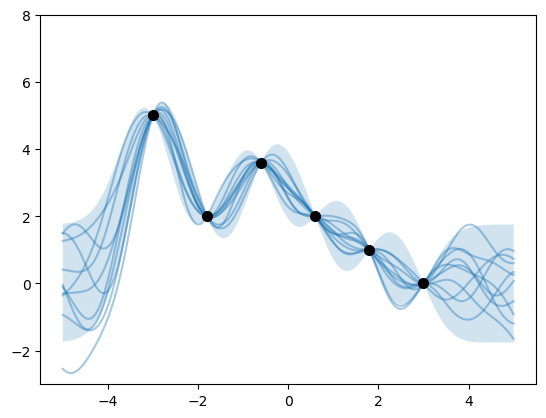

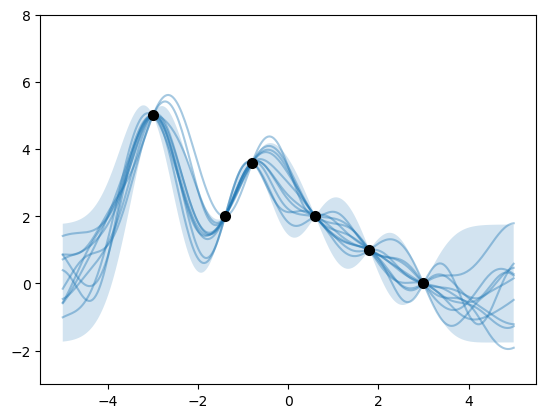

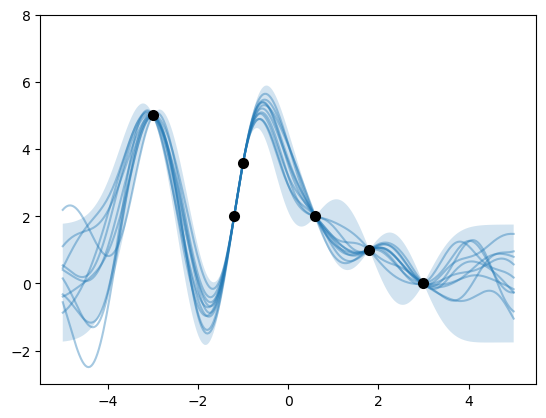

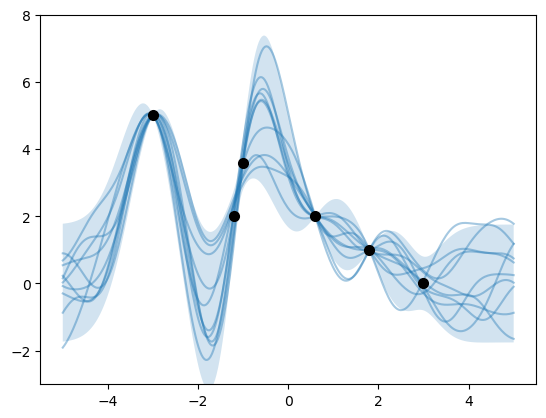

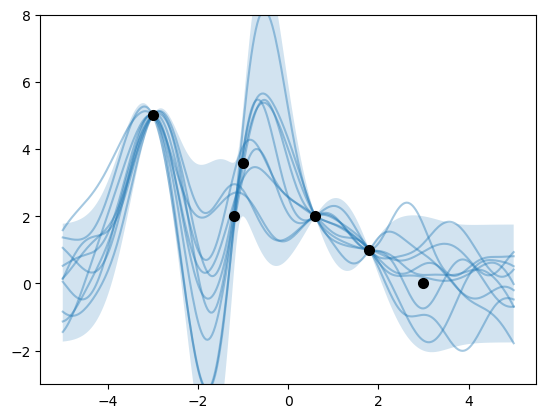

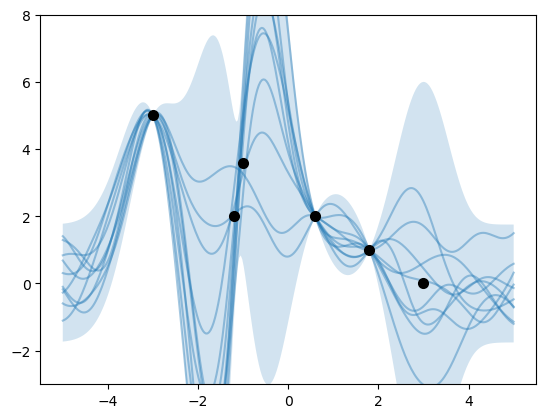

In [4]:
pX = np.linspace(-5, 5, 300)[:, None]

Z = np.array([[-3, -1.8, -0.6, 0.6, 1.8, 3]]).T
m = gpflow.models.SVGP(gpflow.kernels.SquaredExponential(), gpflow.likelihoods.Gaussian(), Z, whiten=False)
gpflow.utilities.multiple_assign(m.kernel, gpflow.utilities.parameter_dict(full.kernel))

i = 1

m.inducing_variable.Z.assign(np.array([[-3, -1.8, -0.6, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 4, 3, 2, 1, 0]]).T)
m.q_sqrt.assign(np.eye(len(Z))[None, :, :] * 0.001)
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.8, -0.6, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 3, 3.3, 2, 1, 0]]).T)
m.q_sqrt.assign(np.eye(len(Z))[None, :, :] * 0.001)
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.8, -0.6, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 2, 3.6, 2, 1, 0]]).T)
m.q_sqrt.assign(np.eye(len(Z))[None, :, :] * 0.001)
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.8, -0.6, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 2, 3.6, 2, 1, 0]]).T)
m.q_sqrt.assign(np.eye(len(Z))[None, :, :] * 0.001)
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.4, -0.8, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 2, 3.6, 2, 1, 0]]).T)
m.q_sqrt.assign(np.eye(len(Z))[None, :, :] * 0.001)
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.2, -1.0, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 2, 3.6, 2, 1, 0]]).T)
m.q_sqrt.assign(np.eye(len(Z))[None, :, :] * 0.001)
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.2, -1.0, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 2, 3.6, 2, 1, 0]]).T)
m.q_sqrt.assign(np.diag([0.001, 0.4, 0.4, 0.001, 0.001, 0.4])[None, :, :])
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.2, -1.0, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 2, 3.6, 2, 1, 0]]).T)
m.q_sqrt.assign(np.diag([0.001, 0.8, 0.8, 0.001, 0.001, 1.0])[None, :, :])
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1

m.inducing_variable.Z.assign(np.array([[-3, -1.2, -1.0, 0.6, 1.8, 3]]).T)
m.q_mu.assign(np.array([[5, 2, 3.6, 2, 1, 0]]).T)
m.q_sqrt.assign(np.diag([0.001, 1.5, 1.5, 0.001, 0.001, 3.0])[None, :, :])
plt.figure()
plotting.plot_1d_model(m, pX=pX, plot_var='f', plot_samples=True, plot_mean=False)
plt.ylim([-3, 8])
plt.savefig(f"./inducing-points-demo-{i}.png"); i += 1


In [5]:
Ms = [2, 3, 5, 7, 8, 9, 10, 15, 16, 17, 18]
models = []
kern = gpflow.kernels.SquaredExponential
for M in Ms:
    Z = np.linspace(-3, 3, M)[:, None]
    m = gpflow.models.SGPR((X, Y), kern(), Z)
    # gpflow.set_trainable(m.inducing_variable, False)
    opt = gpflow.optimizers.Scipy()
    opt.minimize(m.training_loss, variables=m.trainable_variables)
    models.append(m)

In [6]:
fullm = gpflow.models.GPR((X, Y), kern())
opt = gpflow.optimizers.Scipy()
opt.minimize(fullm.training_loss, variables=fullm.trainable_variables)
lml = fullm.log_marginal_likelihood()
full_pY, full_pYv = fullm.predict_f(pX)

In [7]:
lbs = [m.elbo() for m in models]
ubs = [m.upper_bound() for m in models]
lengthscales = [m.kernel.lengthscales.numpy() for m in models]
noise_stds = [m.likelihood.variance.numpy() ** 0.5 for m in models]

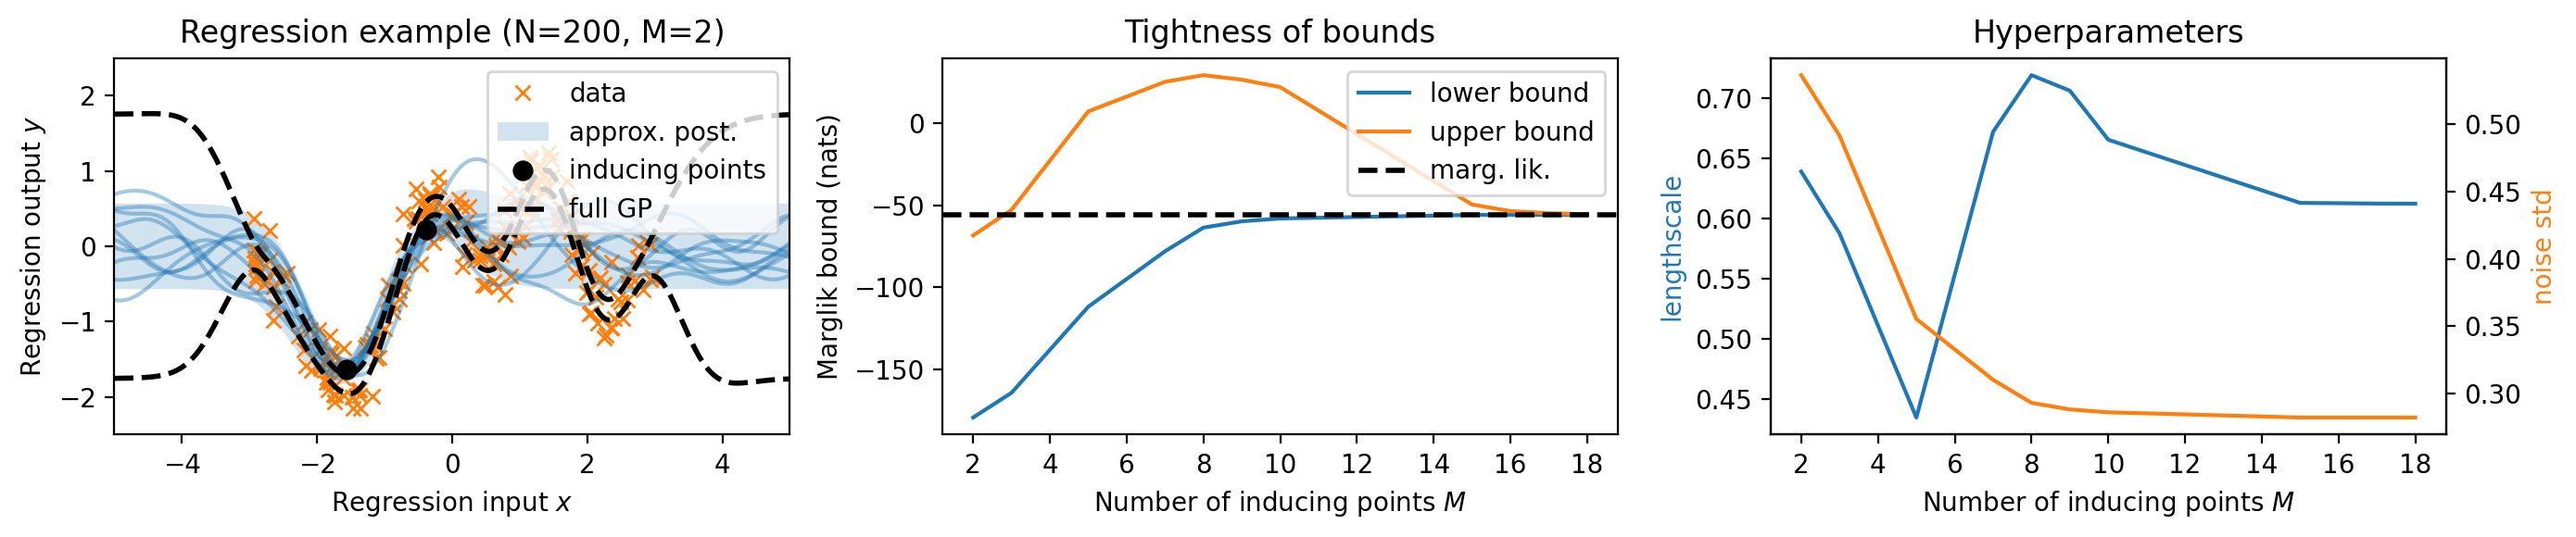

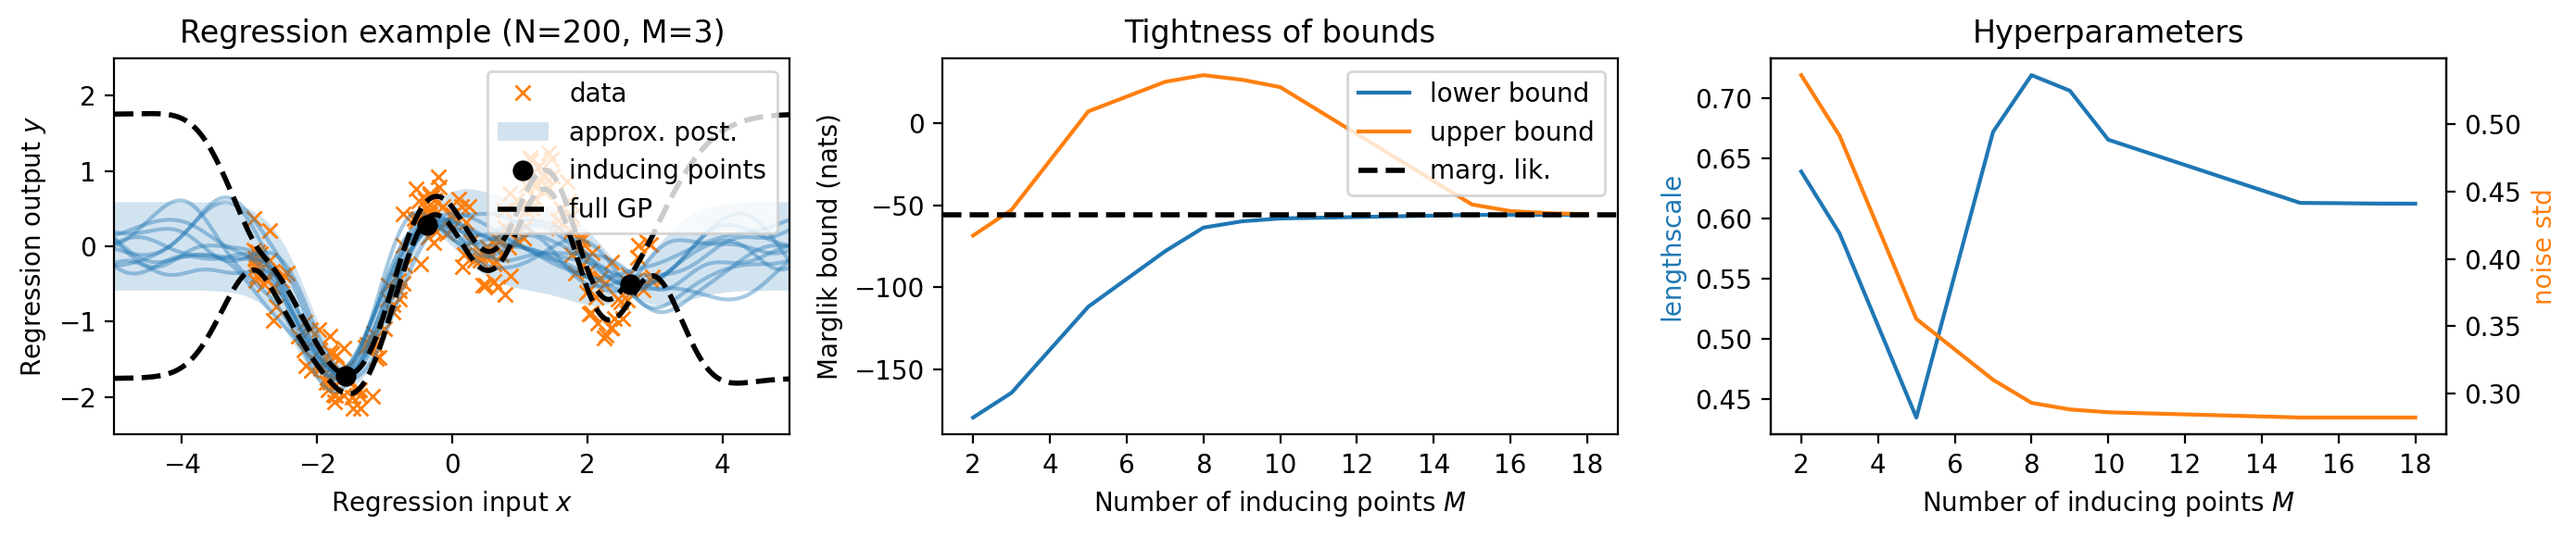

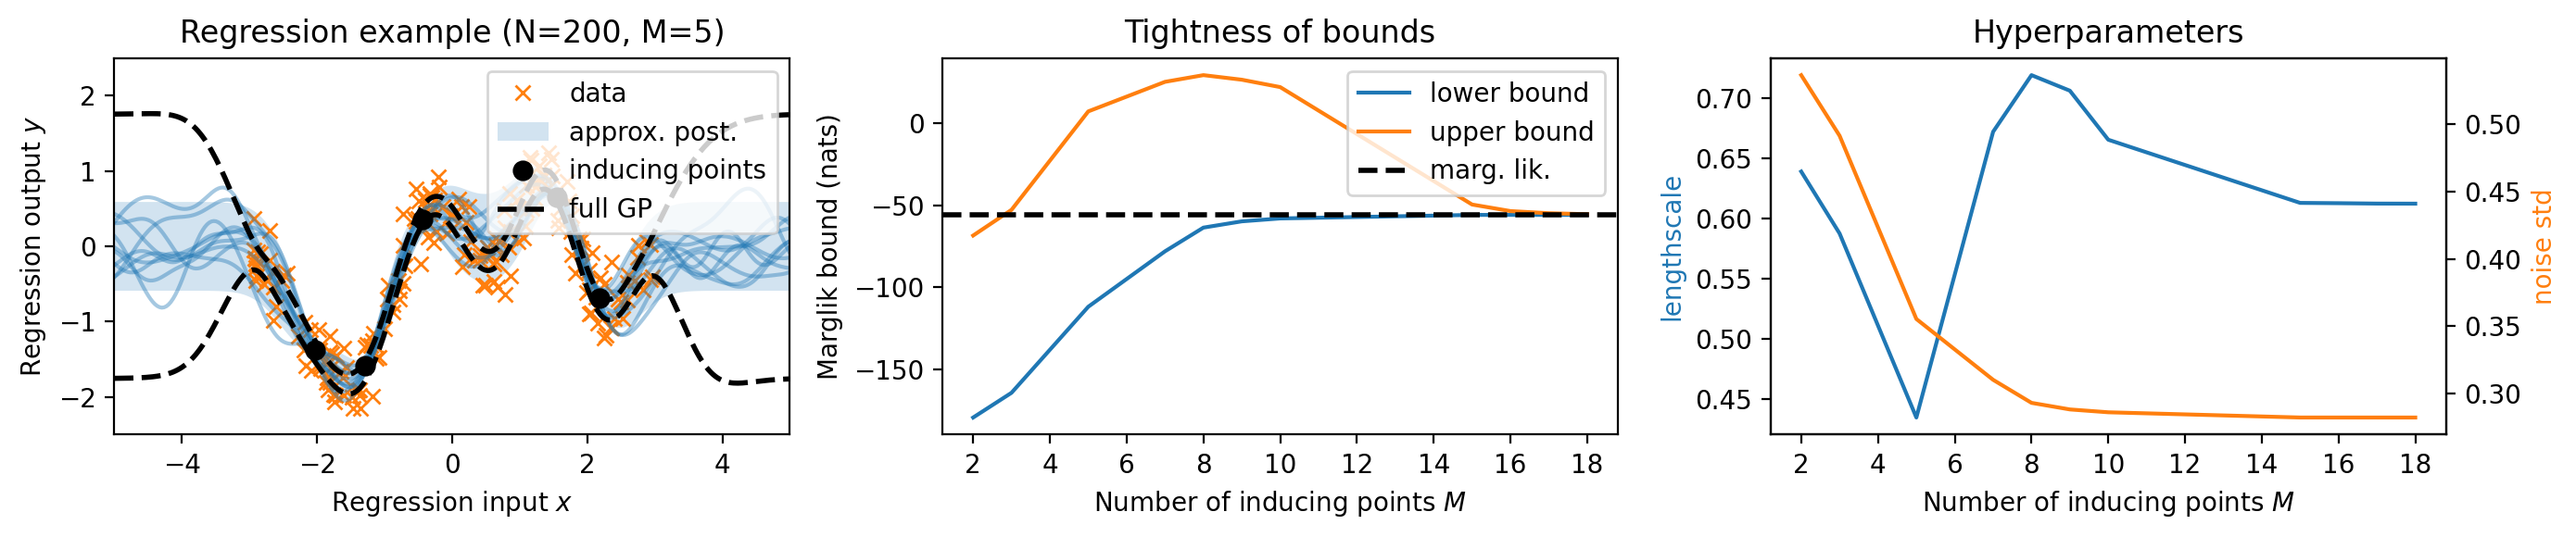

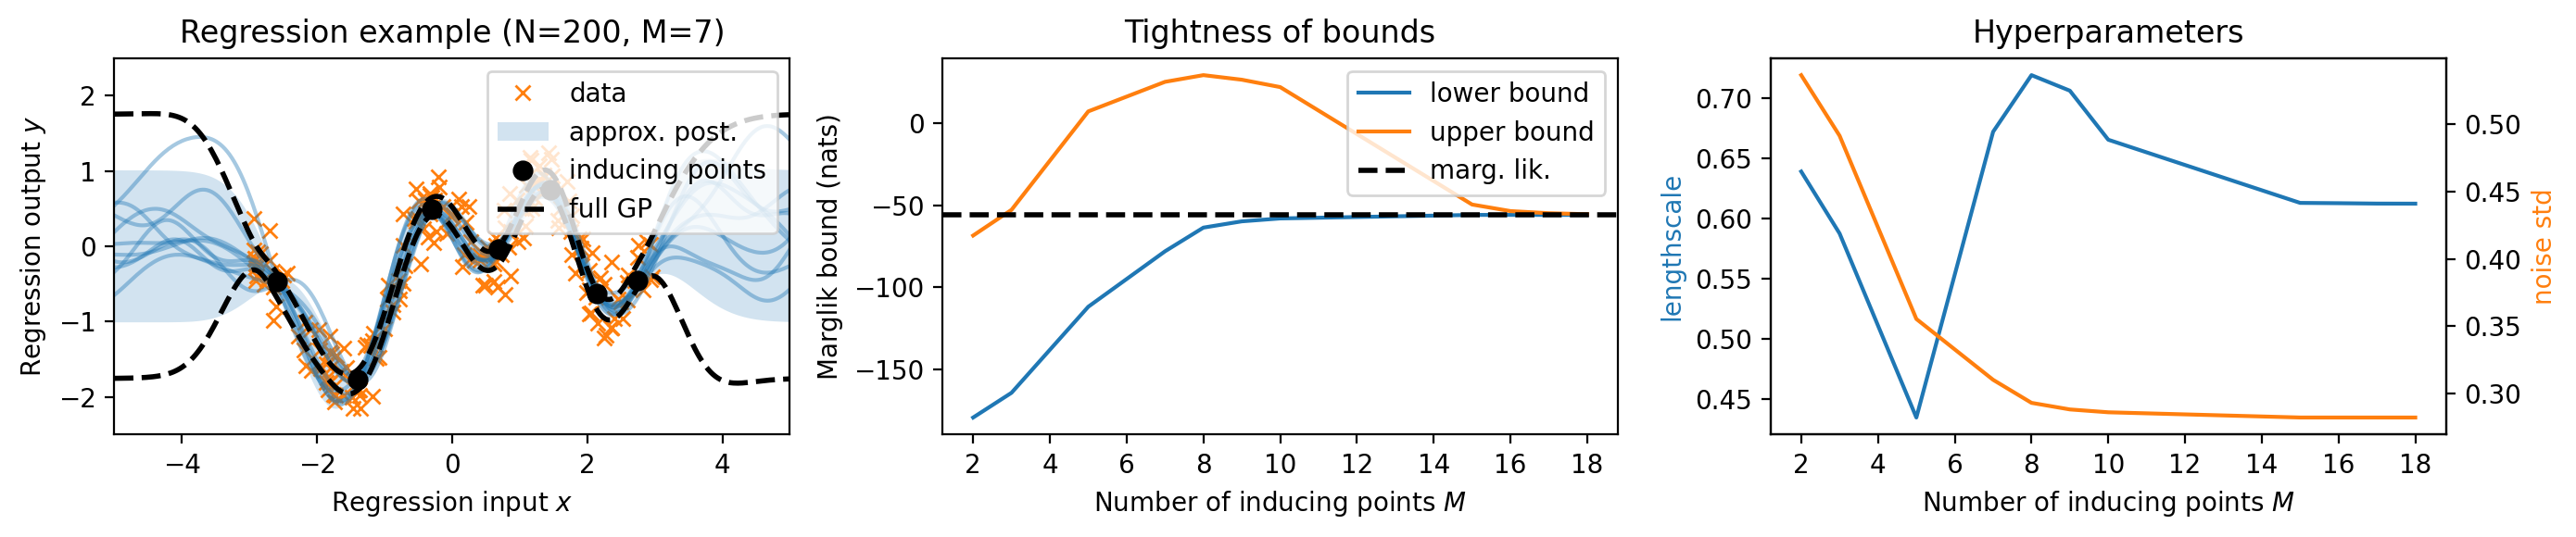

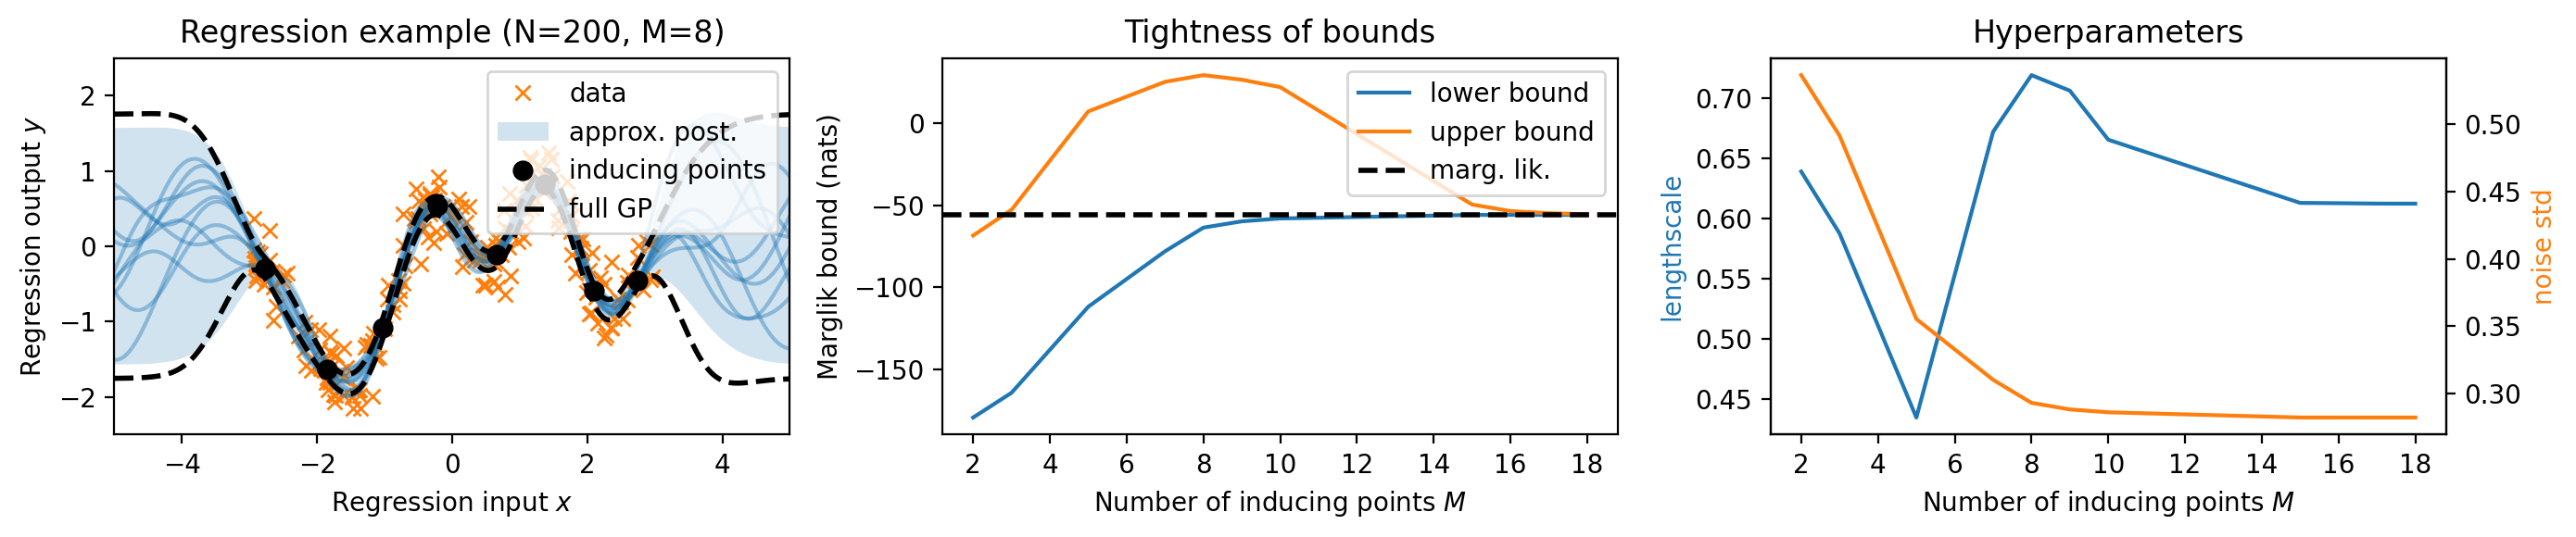

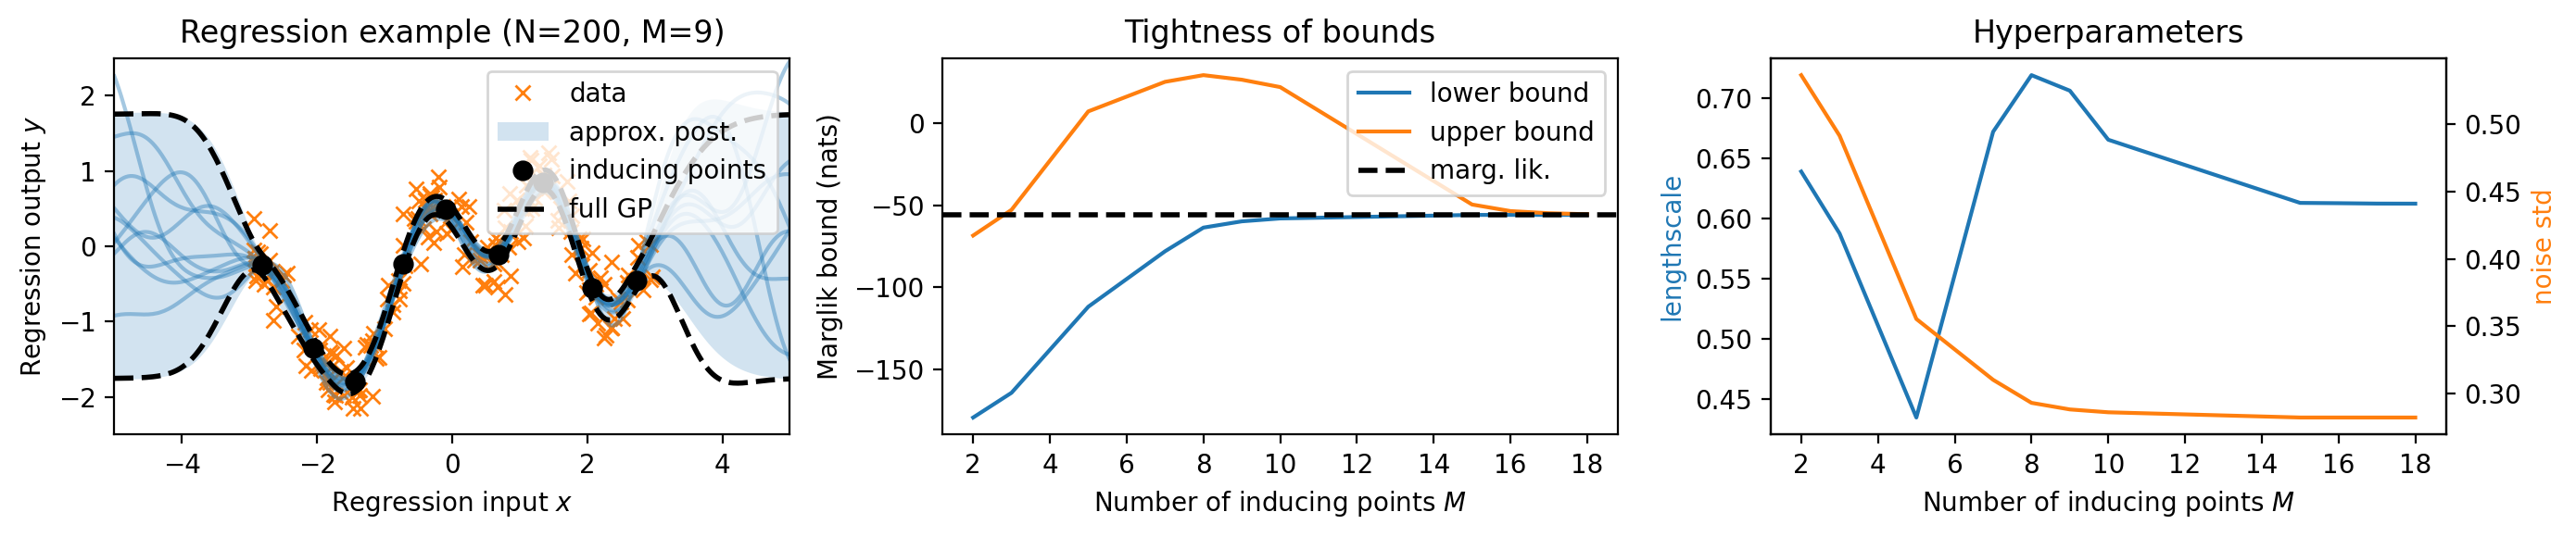

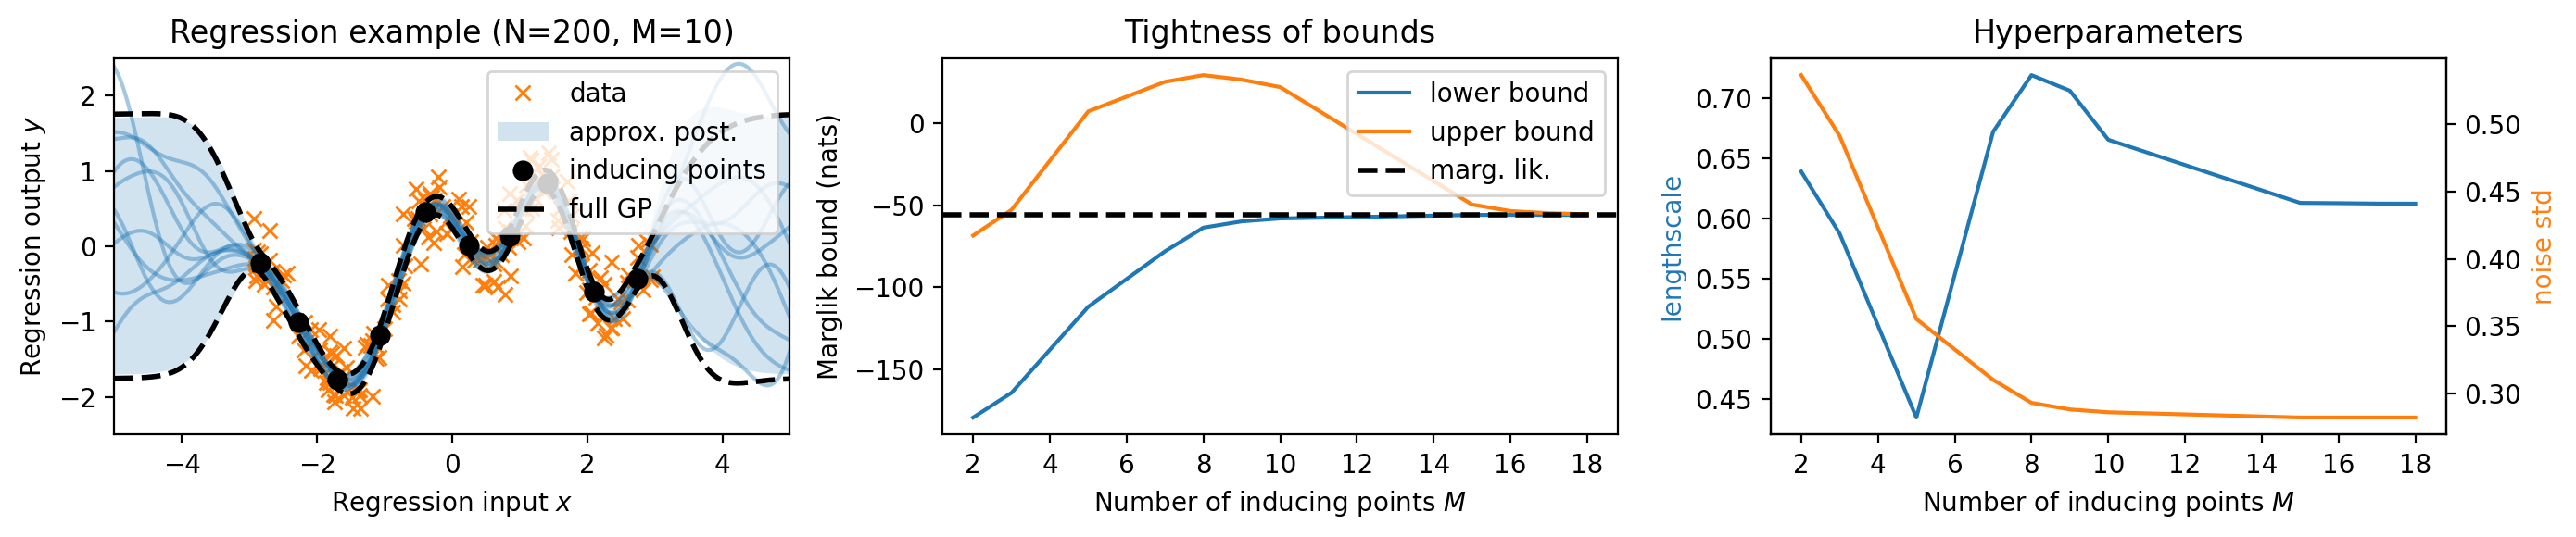

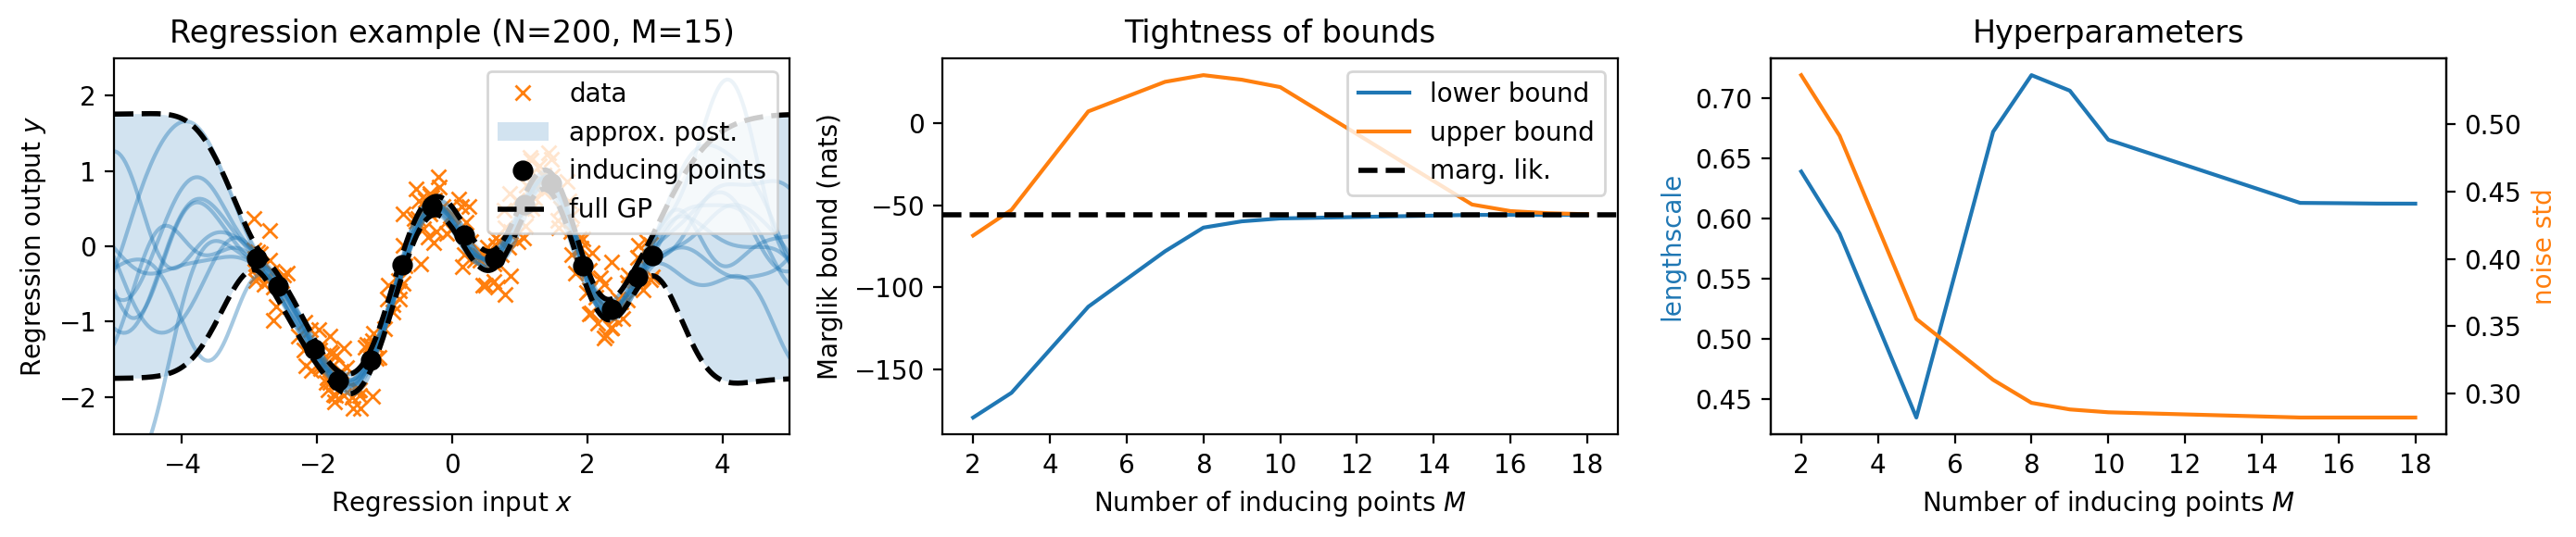

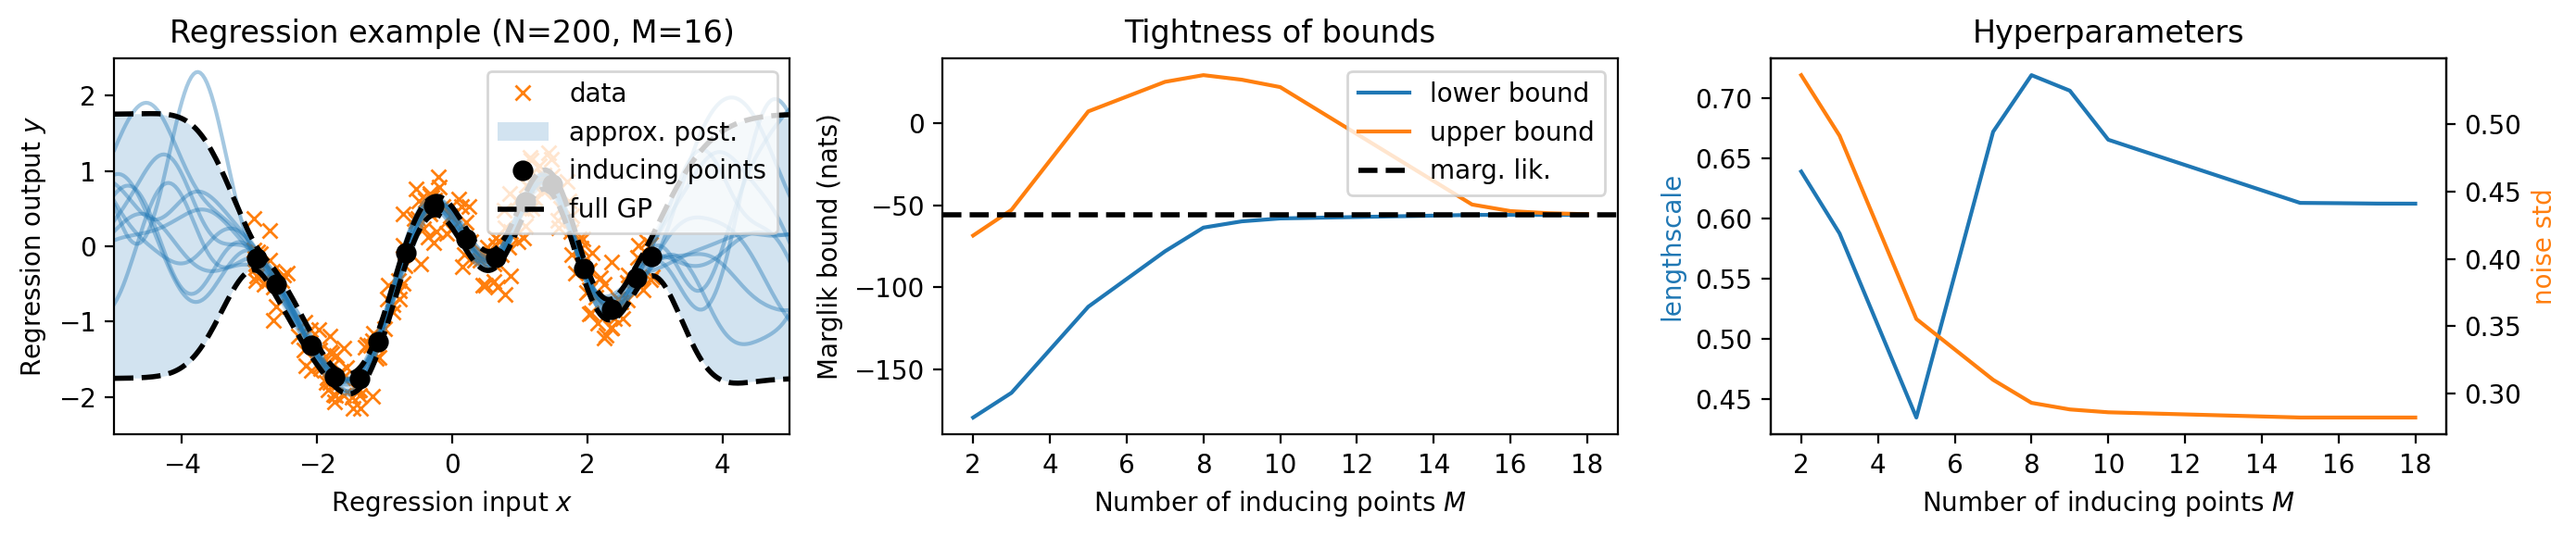

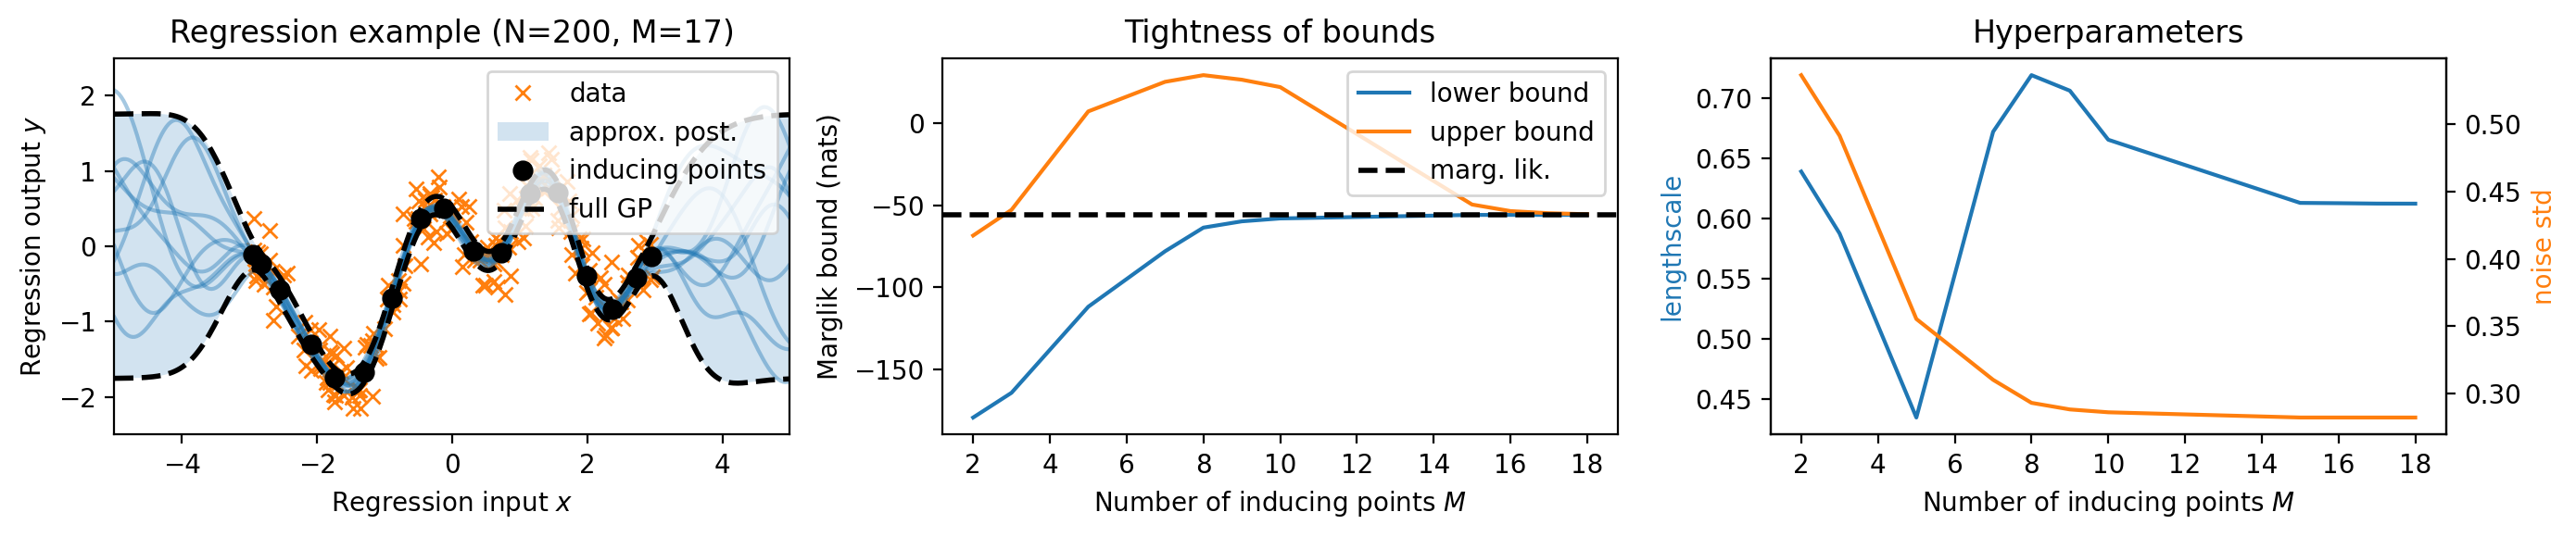

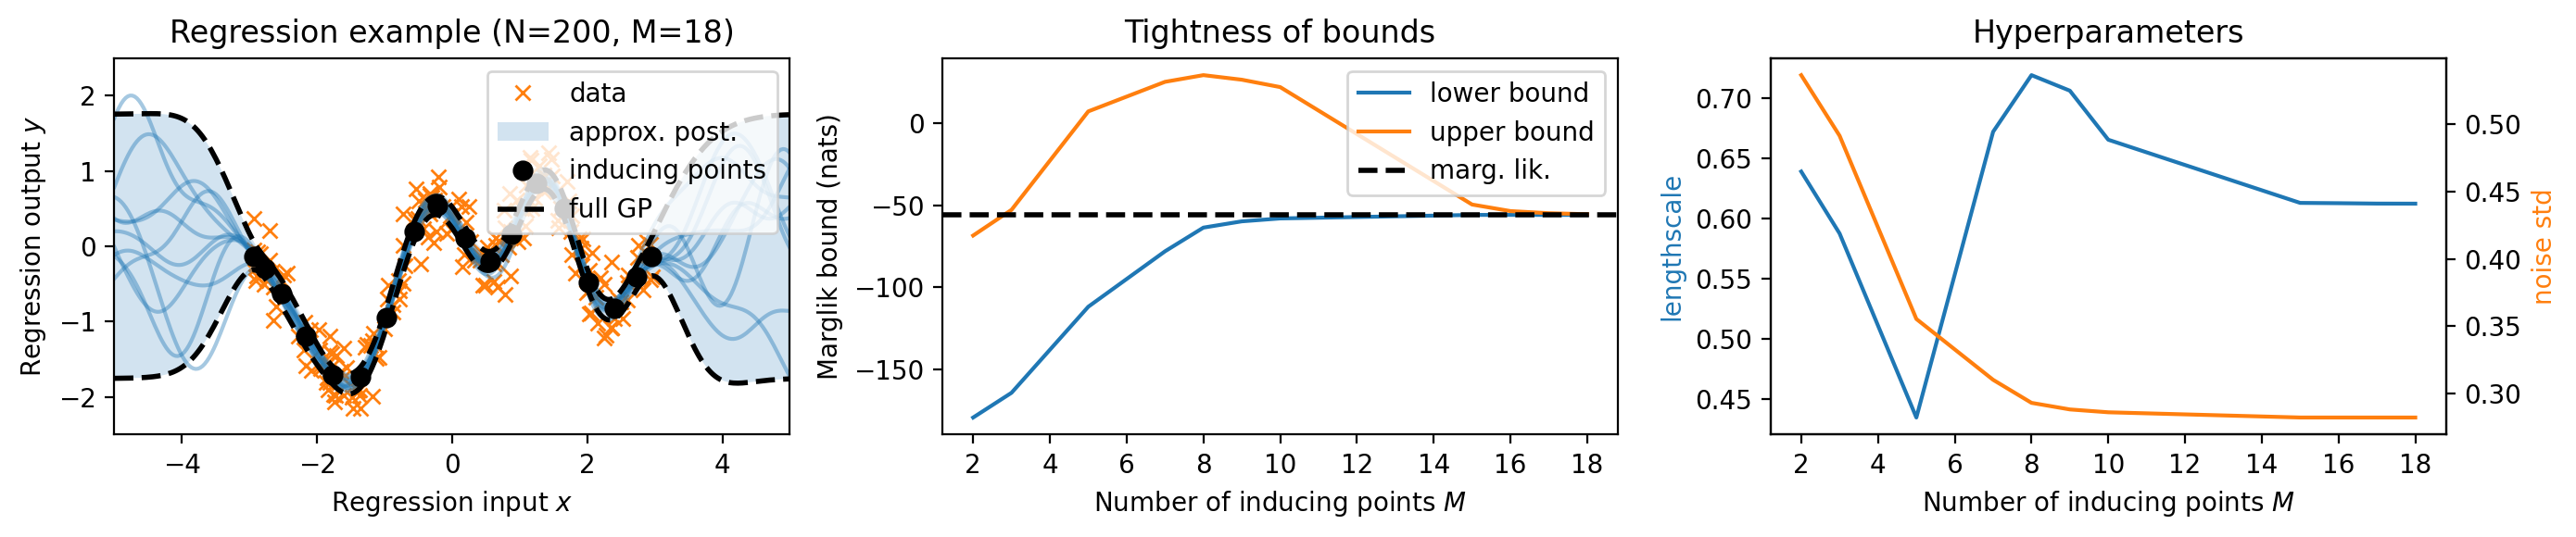

In [8]:
for i, M in enumerate(Ms):
    fig, axs = plt.subplots(1, 3, figsize=(14, 3), dpi=200)
    plotting.plot_1d_model(models[i], pX=pX, plot_var='f', plot_samples=True, plot_mean=False, ax=axs[0])
    
    axs[0].plot(pX, full_pY + 2.0 * full_pYv ** 0.5, color='k', linestyle='--', linewidth=2.0)
    axs[0].plot(pX, full_pY - 2.0 * full_pYv ** 0.5, color='k', linestyle='--', linewidth=2.0, label="full GP")
    axs[0].set_xlim(-5, 5)
    axs[0].set_ylim(-2.5, 2.5)
    axs[0].set_xlabel("Regression input $x$")
    axs[0].set_ylabel("Regression output $y$")
    axs[0].set_title(f"Regression example (N={len(X)}, M={M})")
    axs[0].legend(loc='upper right')
    
    axs[1].plot(Ms, lbs, label='lower bound')
    axs[1].plot(Ms, ubs, label='upper bound')
    # axs[1].axvline(Ms[i], color='C3')
    axs[1].set_title("Tightness of bounds")
    axs[1].set_ylabel("Marglik bound (nats)")
    axs[1].set_xlabel("Number of inducing points $M$")
    axs[1].axhline(lml, color='k', linestyle='--', label="marg. lik.", linewidth=2.0)
    axs[1].legend(loc='upper right')
    axs[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    
    if len(axs) > 2:
        axs[2].plot(Ms, lengthscales)
        ax2 = axs[2].twinx()
        ax2.plot(Ms, noise_stds, 'C1')
        ax2.set_ylabel("noise std", color="C1")
        axs[2].set_ylabel("lengthscale", color="C0")
        axs[2].set_xlabel("Number of inducing points $M$")
        axs[2].set_title("Hyperparameters")
        axs[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    
    plt.tight_layout()
    fig.savefig(f"sgpr-tightness-{i+1}.png")

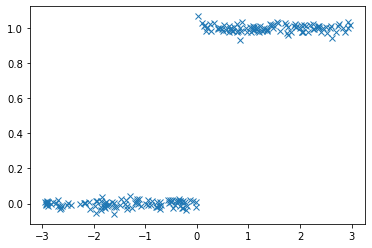

In [9]:
# Y = (fullm.predict_f(X)[0].numpy() > 0.0).astype('float')
# Y = (np.sin(np.pi * 0.667 * X) > 0.0).astype('float')
Y = (X > 0.0).astype('float') + np.random.randn(*X.shape) * 2e-2
plt.plot(X, Y, 'x')

In [10]:
kern = gpflow.kernels.Matern12

fullm = gpflow.models.GPR((X, Y), kern())
gpflow.set_trainable(fullm.kernel.variance, False)
opt = gpflow.optimizers.Scipy()
opt.minimize(fullm.training_loss, variables=fullm.trainable_variables)
lml = fullm.log_marginal_likelihood()
full_pY, full_pYv = fullm.predict_f(pX)

In [11]:
# Ms = [2, 5, 10, 20, 50, 100, 110, 120, 130, 140]
Ms = [10, 20, 30, 40, 50, 80, 100, 120, 150, 180, 190]
models = []
for M in Ms:
    #Z = np.linspace(-3, 3, M)[:, None]
    Z = X[:M, :].copy()
    m = gpflow.models.SGPR((X, Y), kern(), Z)
    gpflow.set_trainable(m.kernel.variance, False)
    gpflow.set_trainable(m.inducing_variable, False)
    opt = gpflow.optimizers.Scipy()
    opt.minimize(m.training_loss, variables=m.trainable_variables)
    models.append(m)

In [12]:
lbs = [m.elbo() for m in models]
ubs = [m.upper_bound() for m in models]
lengthscales = [m.kernel.lengthscales.numpy() for m in models]
noise_stds = [m.likelihood.variance.numpy() ** 0.5 for m in models]

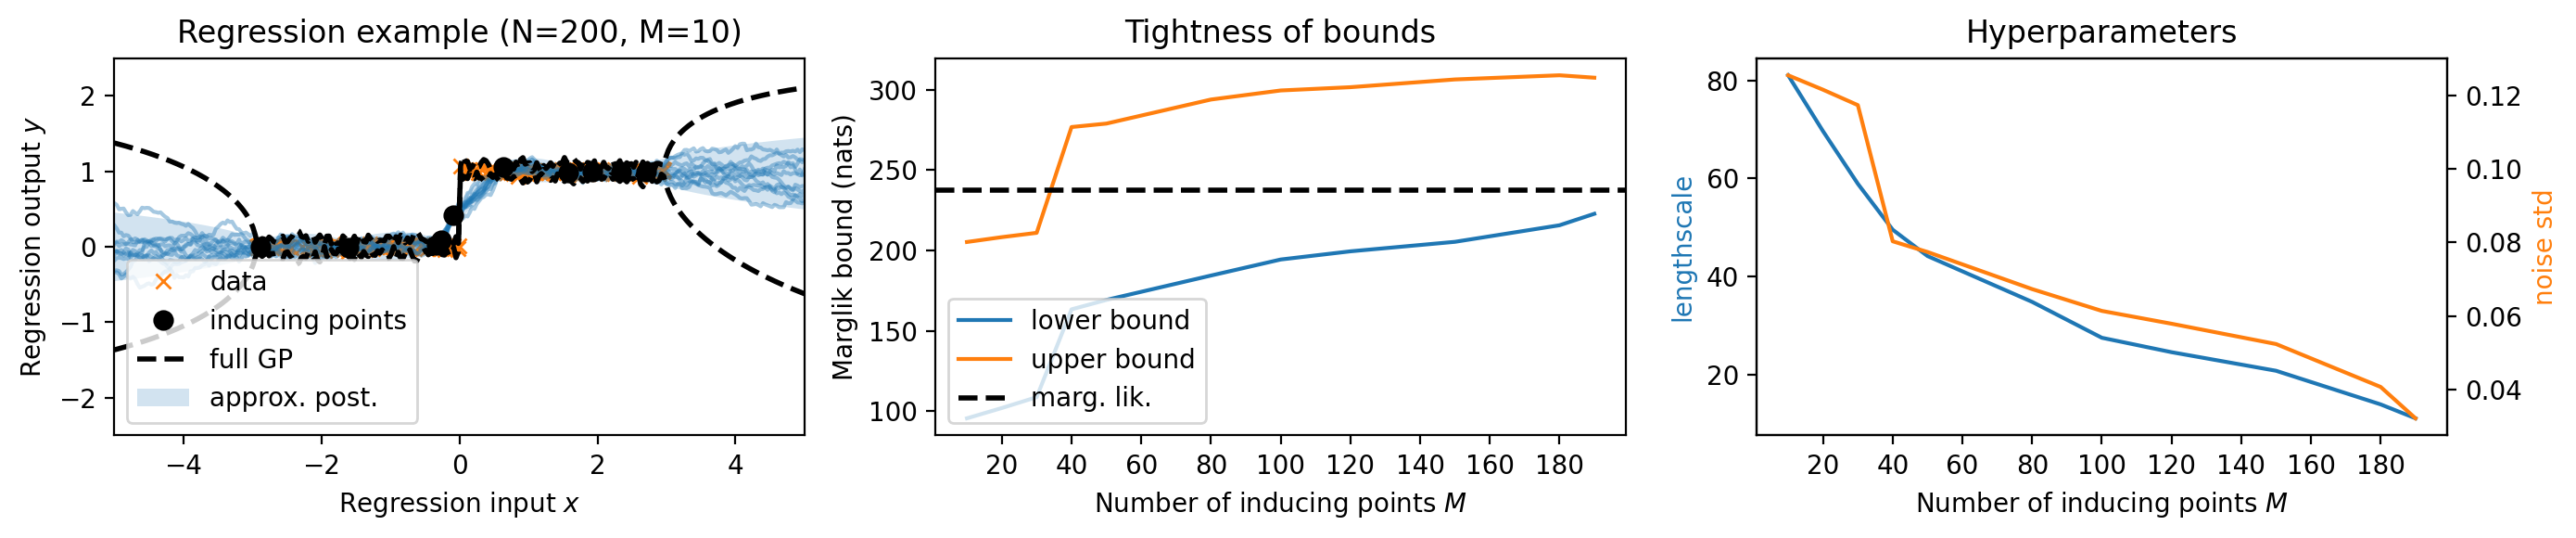

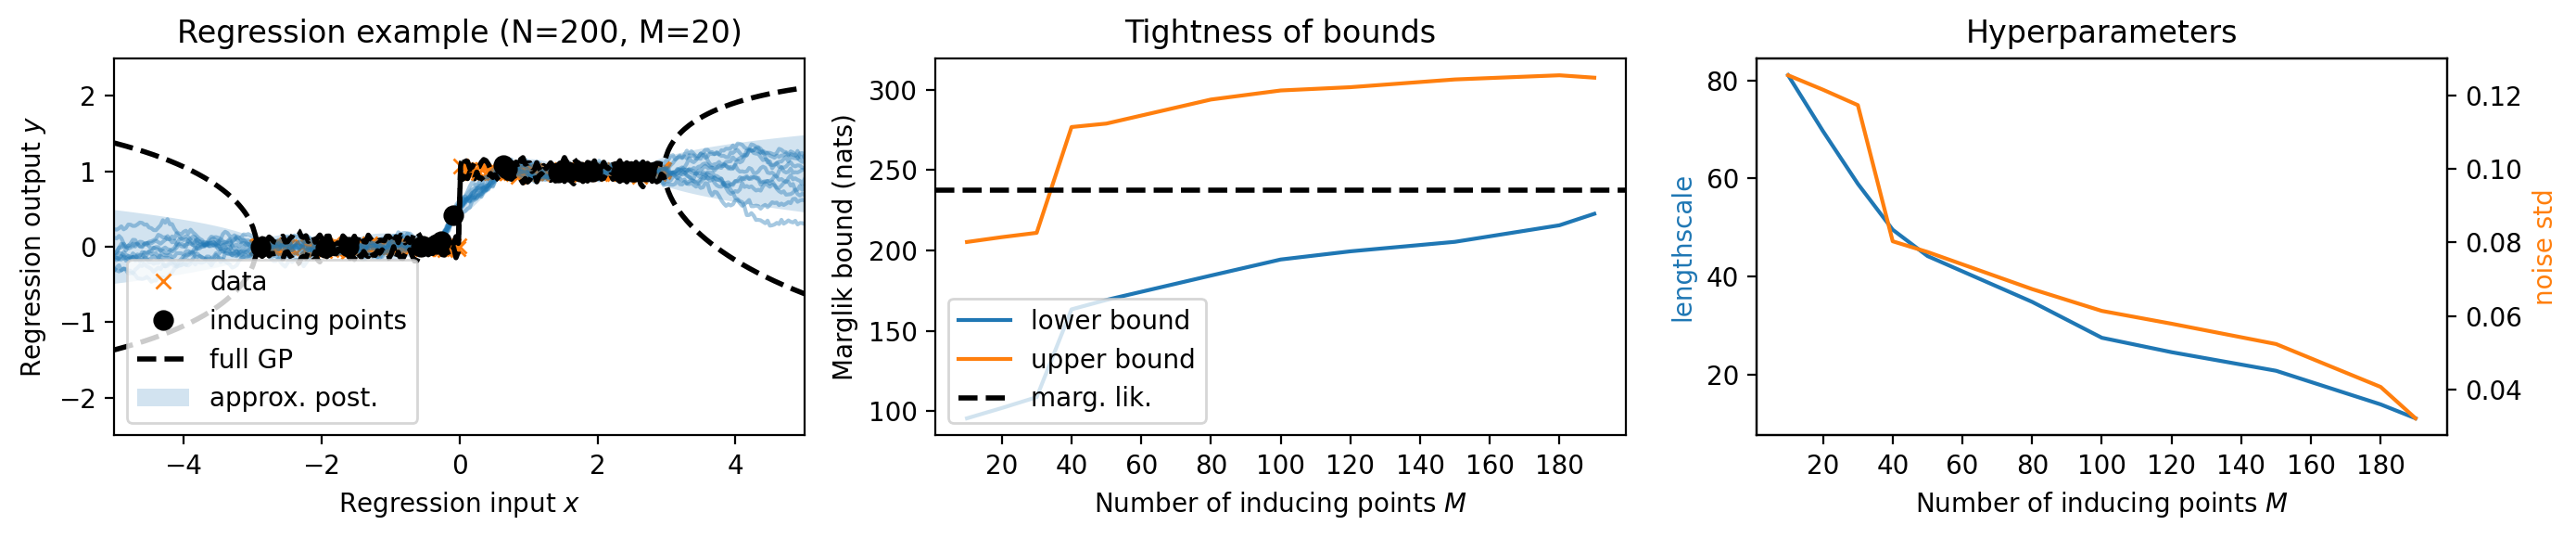

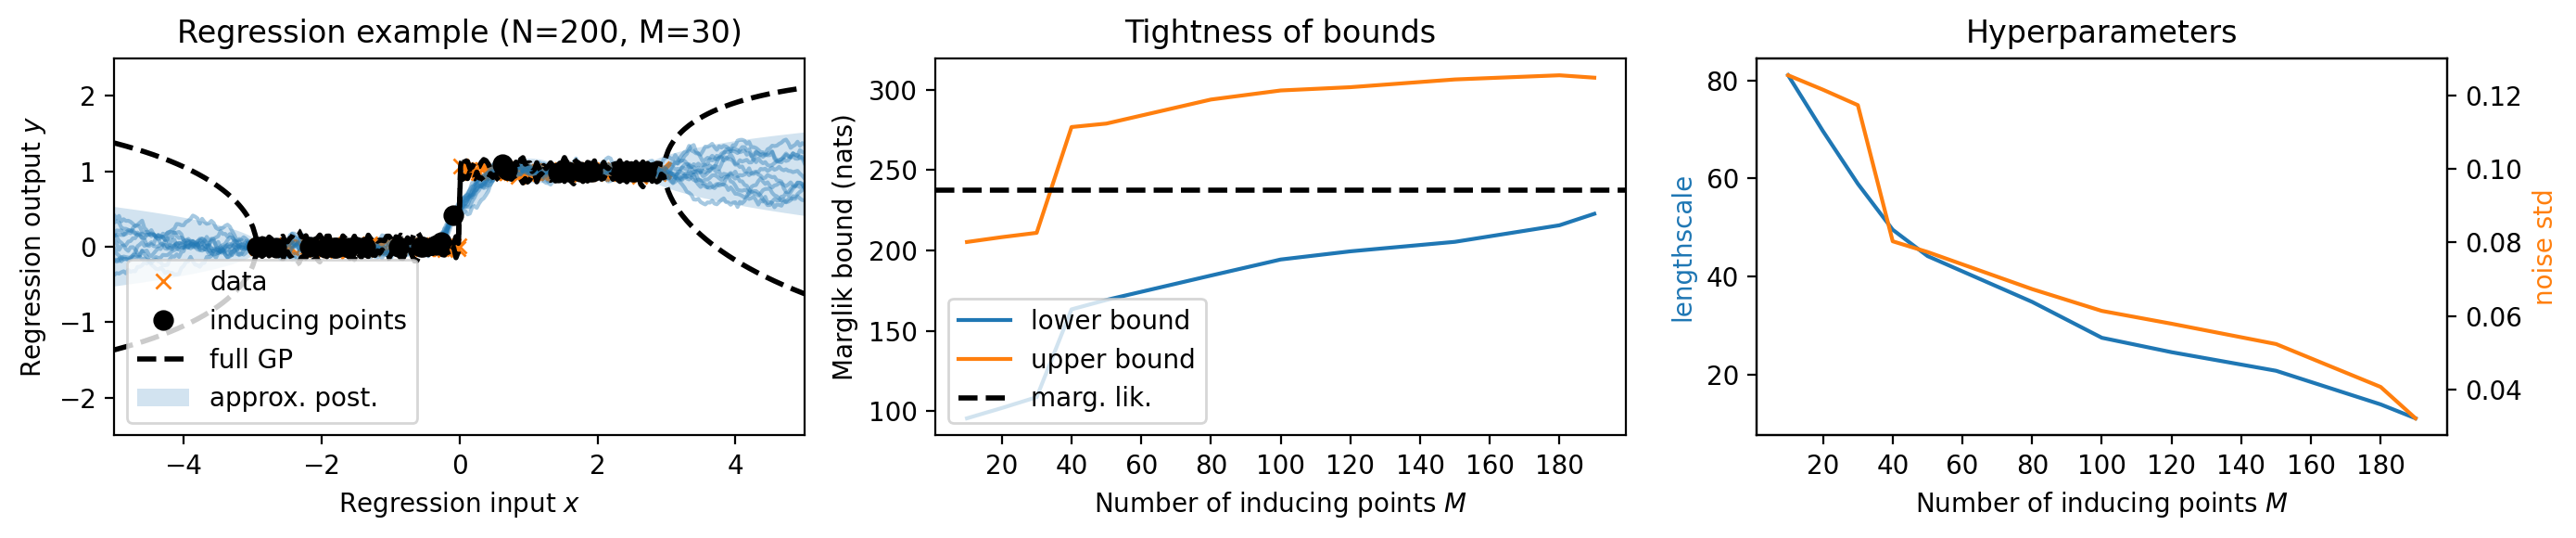

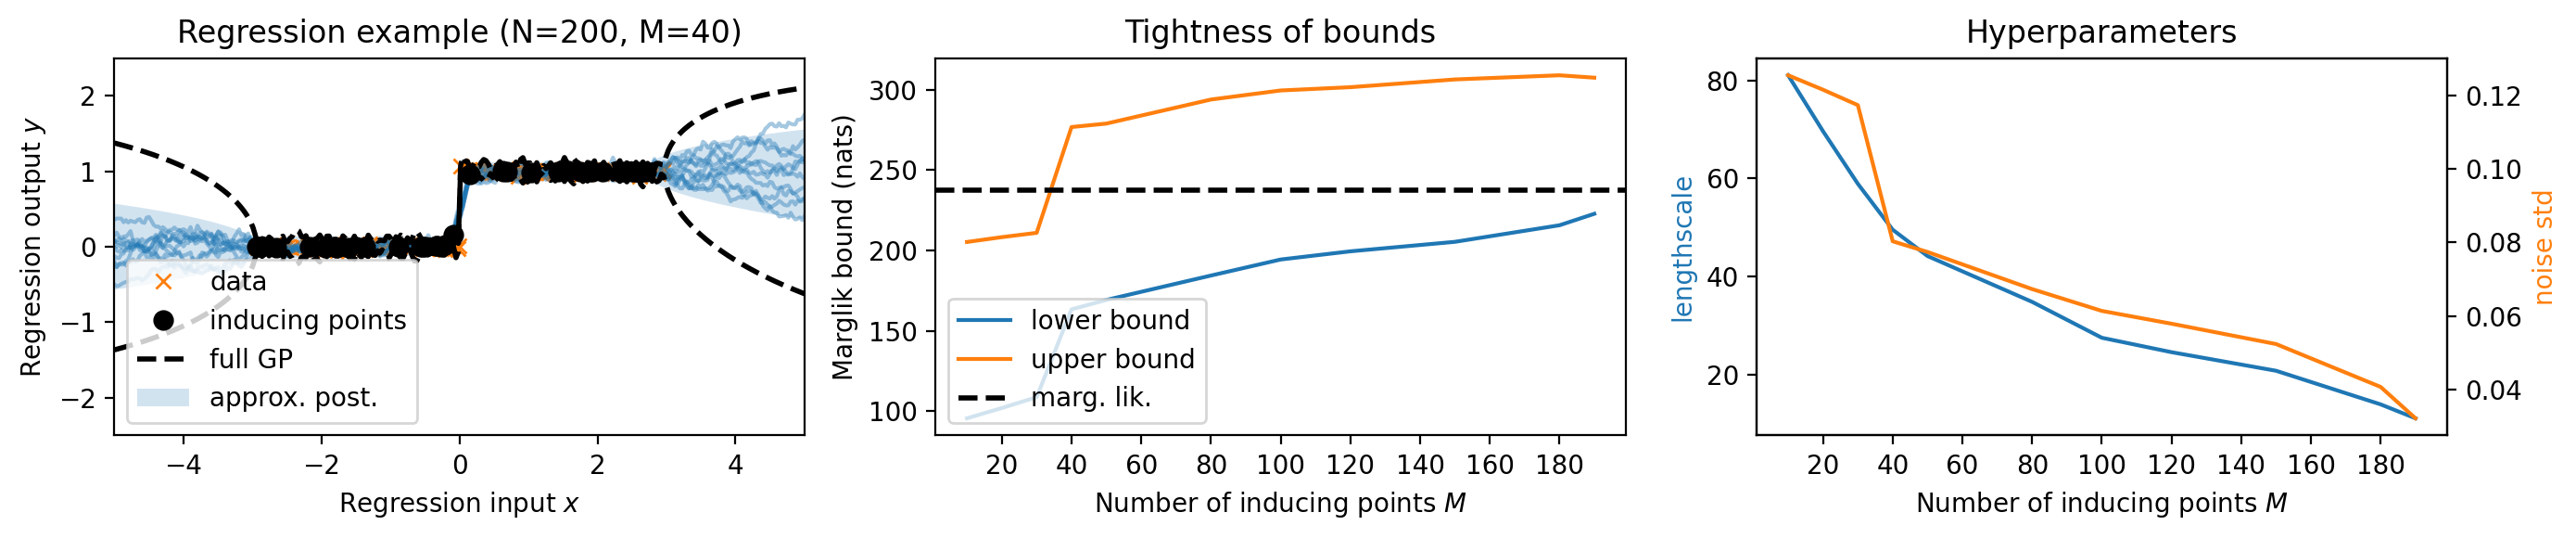

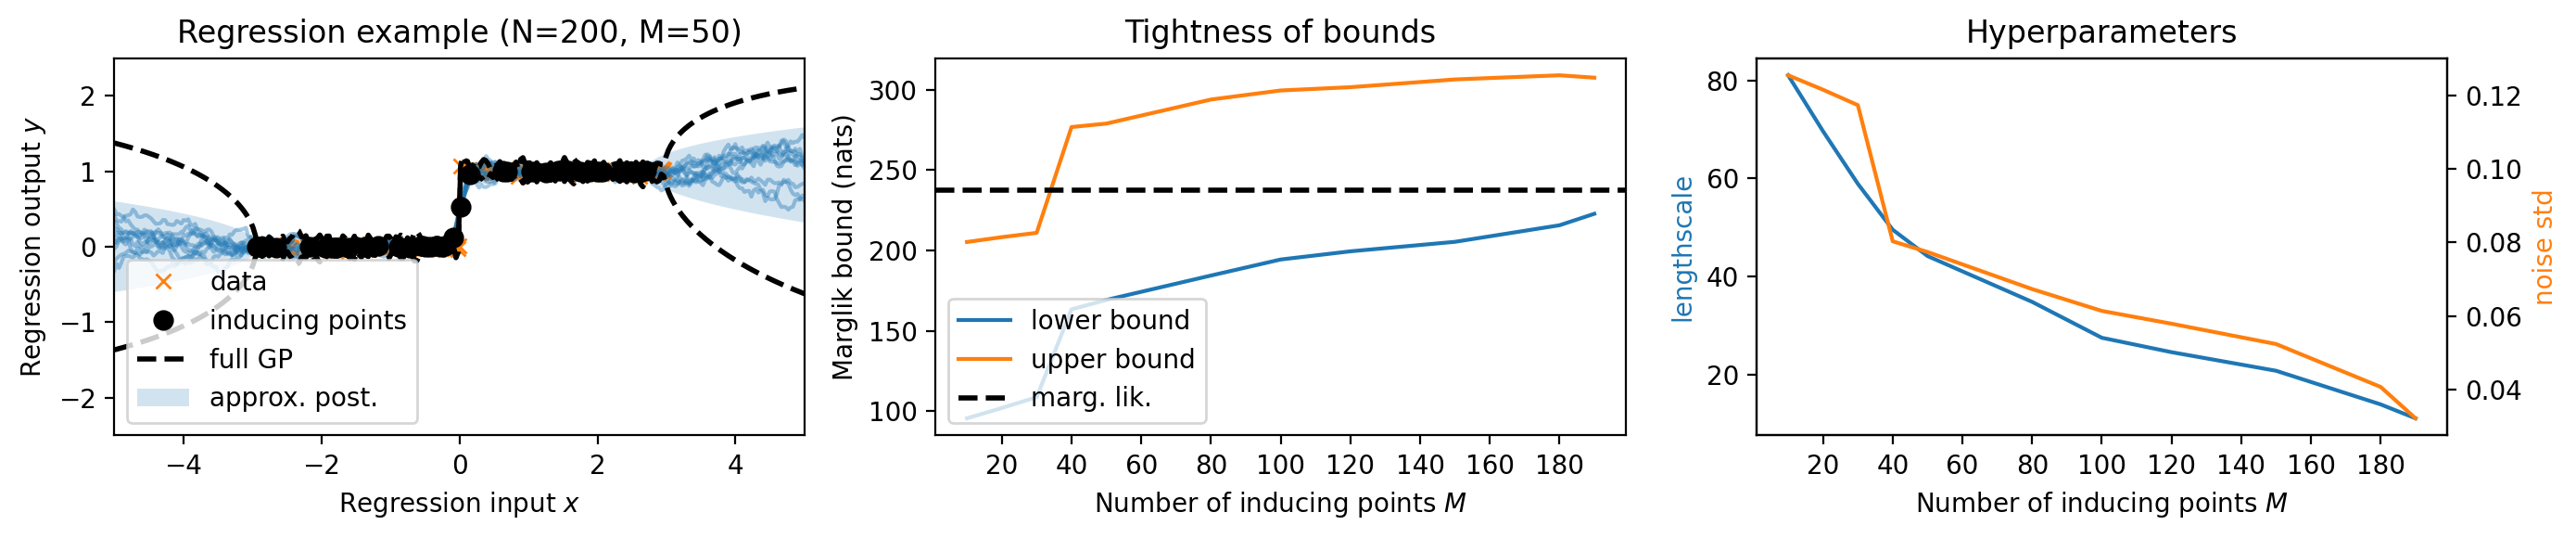

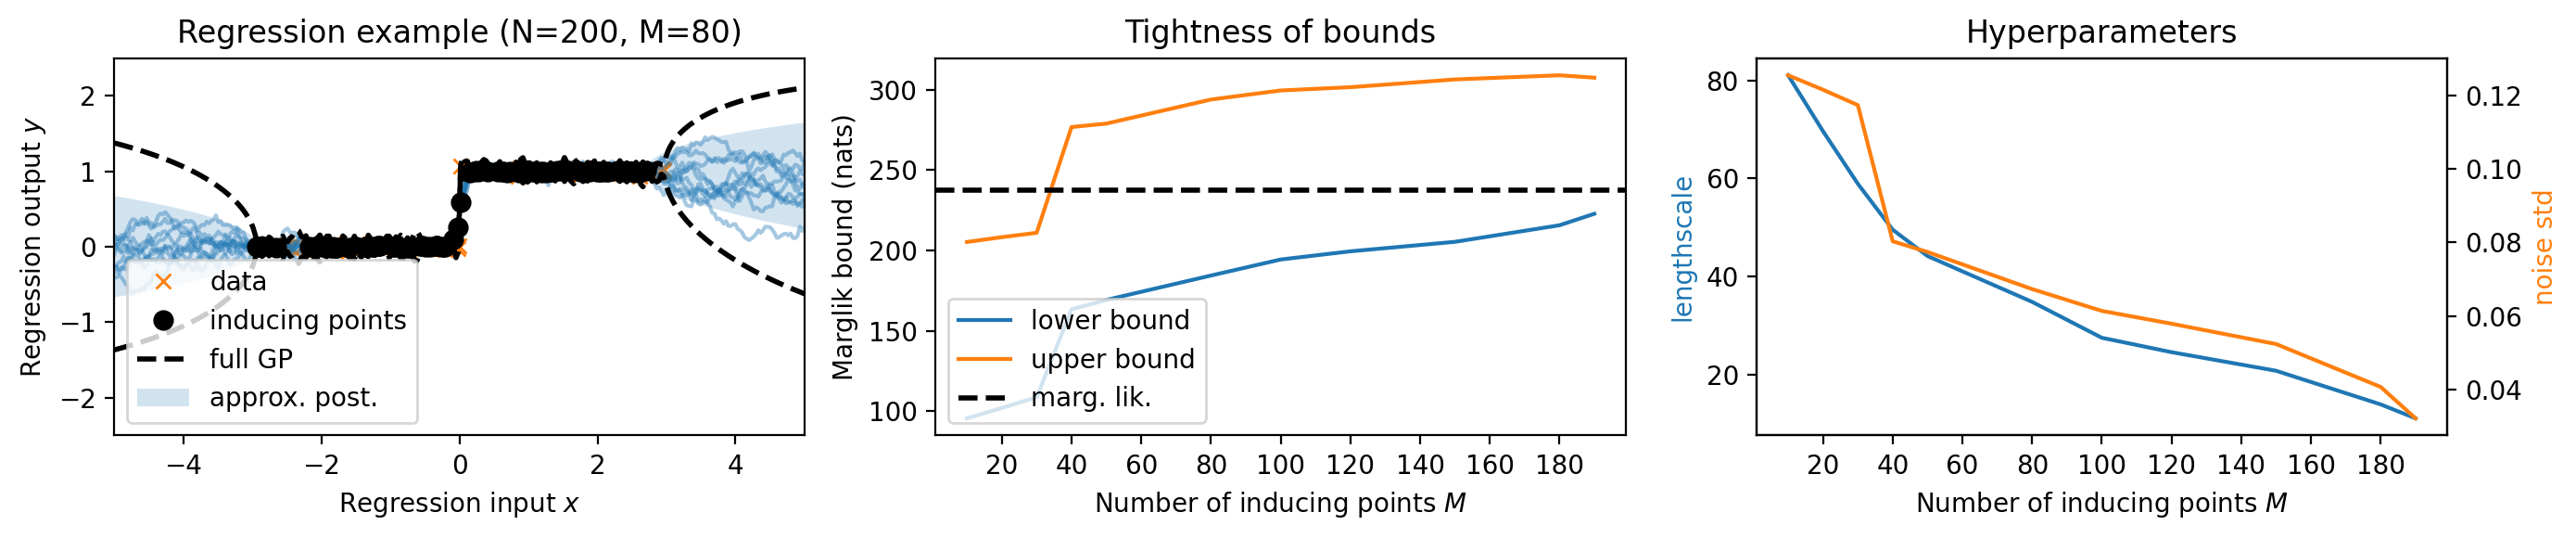

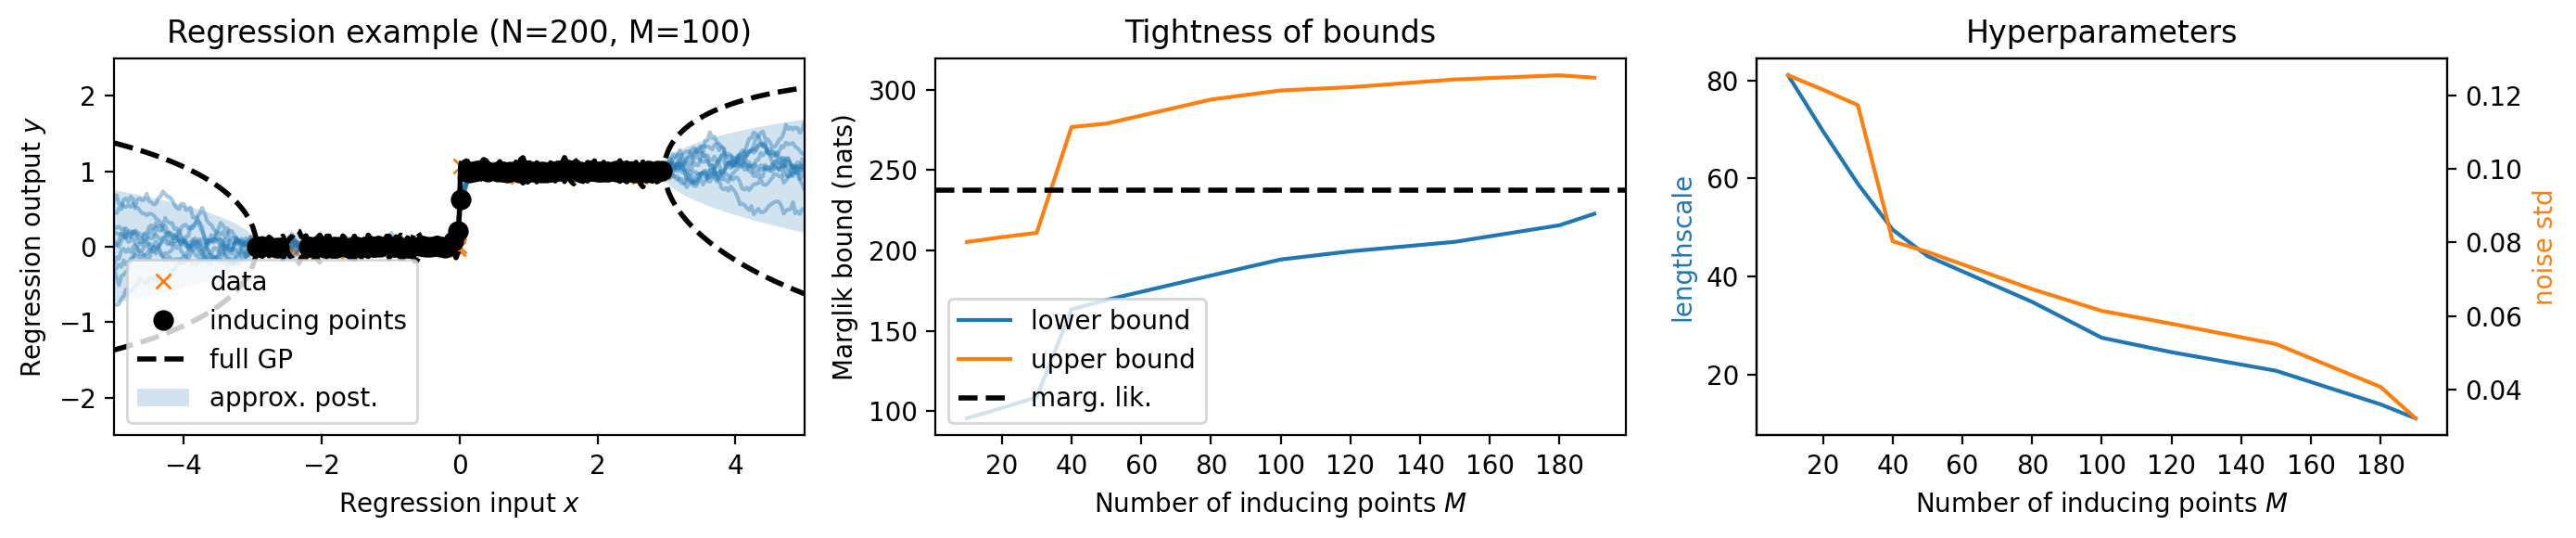

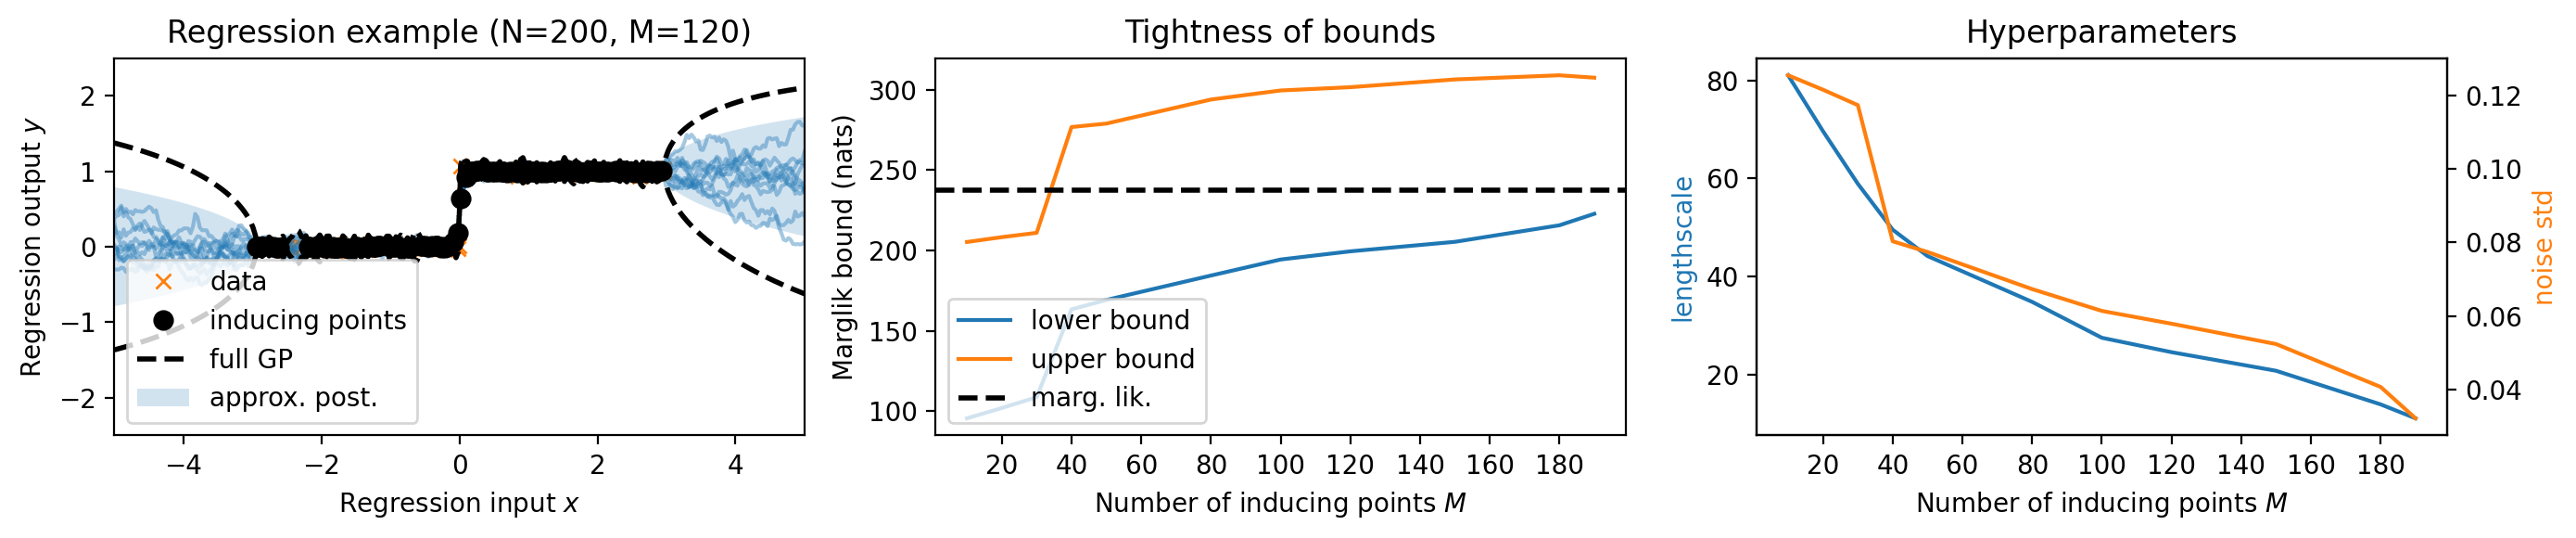

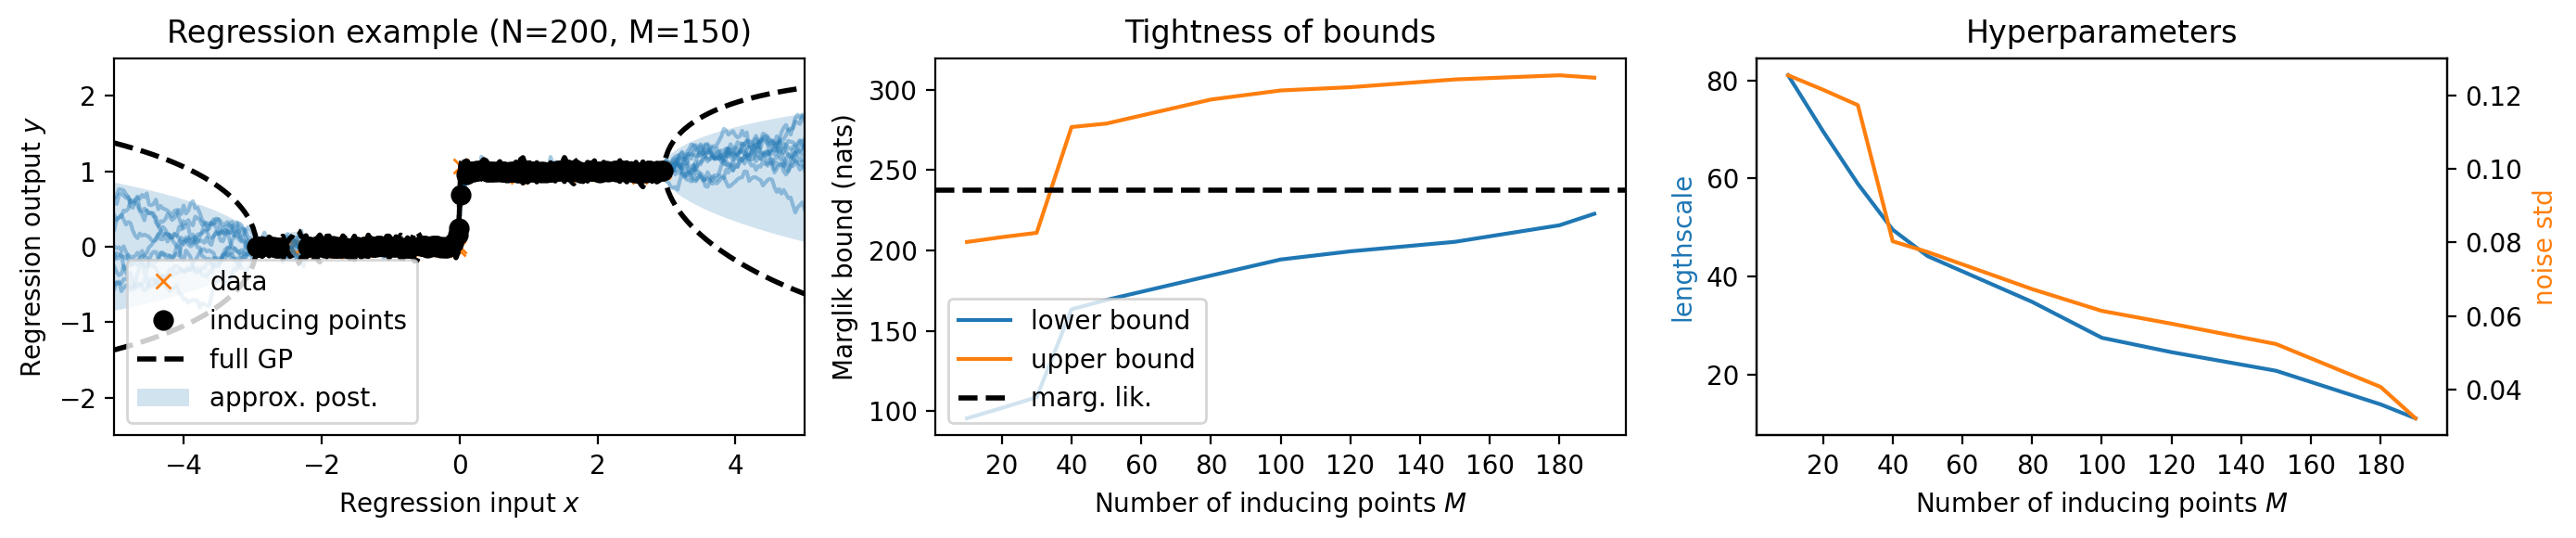

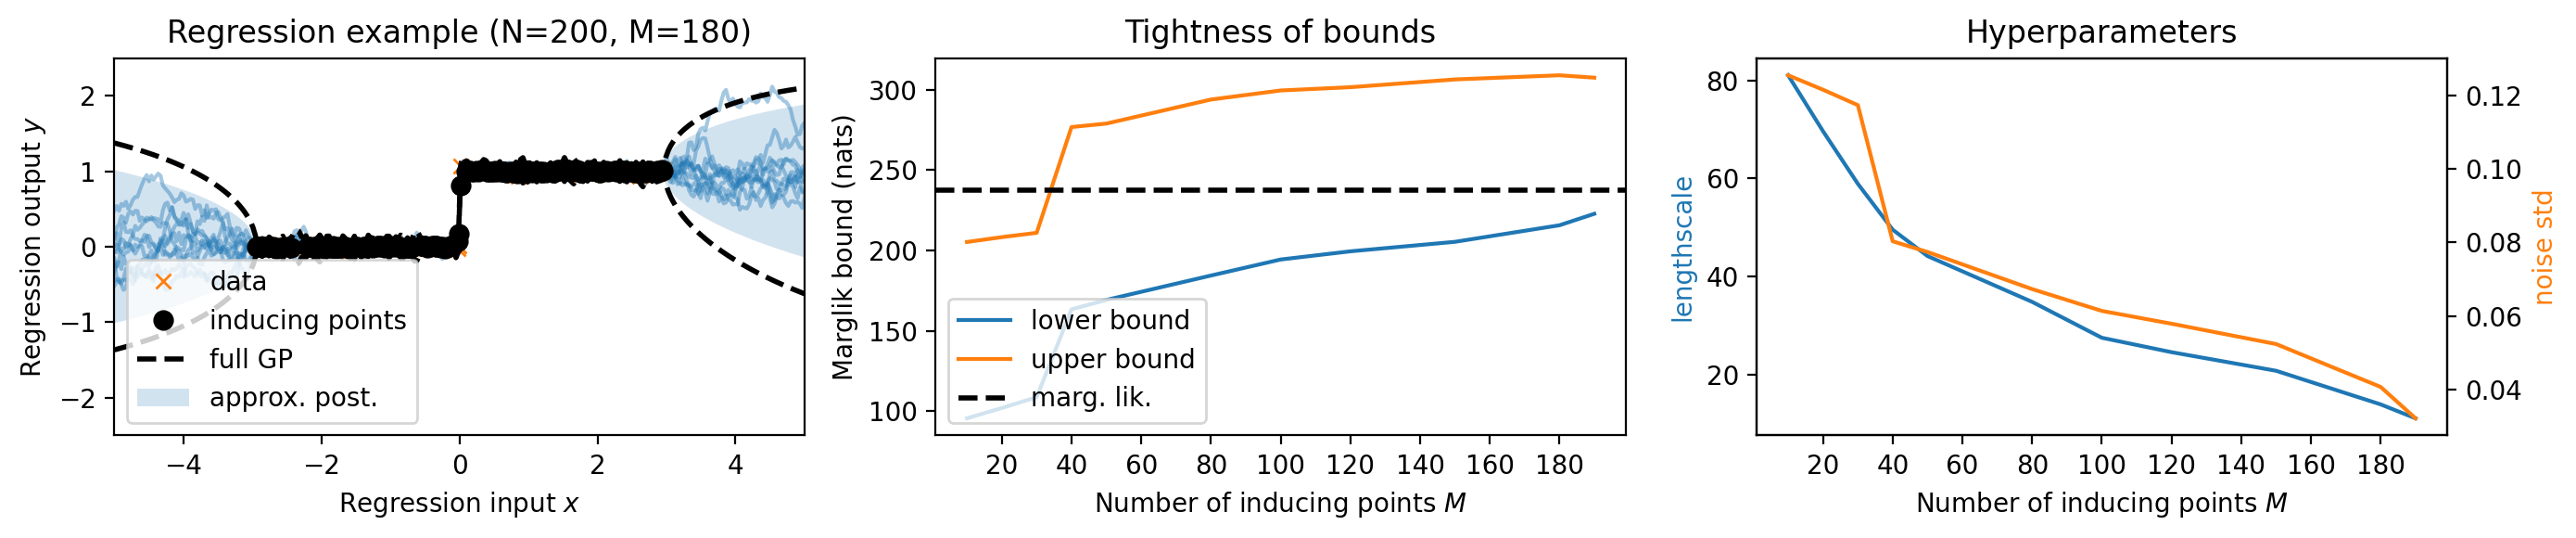

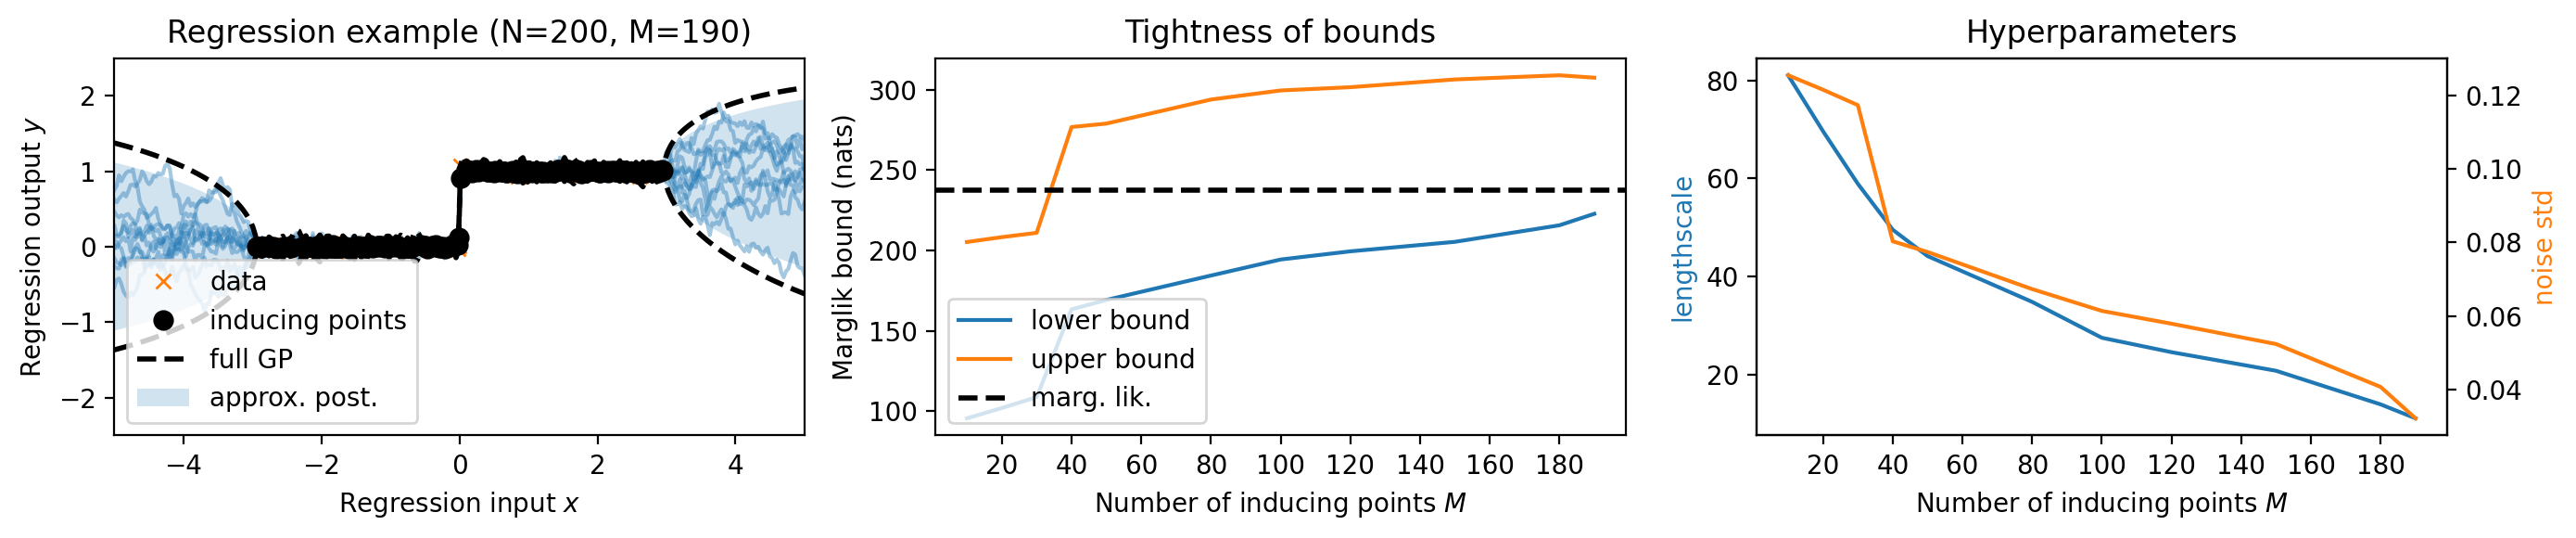

In [13]:
for i, M in enumerate(Ms):
    fig, axs = plt.subplots(1, 3, figsize=(14, 3), dpi=200)
    plotting.plot_1d_model(models[i], pX=pX, plot_var='f', plot_samples=True, plot_mean=False, ax=axs[0])
    
    axs[0].plot(pX, full_pY + 2.0 * full_pYv ** 0.5, color='k', linestyle='--', linewidth=2.0)
    axs[0].plot(pX, full_pY - 2.0 * full_pYv ** 0.5, color='k', linestyle='--', linewidth=2.0, label="full GP")
    axs[0].set_xlim(-5, 5)
    axs[0].set_ylim(-2.5, 2.5)
    axs[0].set_xlabel("Regression input $x$")
    axs[0].set_ylabel("Regression output $y$")
    axs[0].set_title(f"Regression example (N={len(X)}, M={M})")
    axs[0].legend(loc='lower left')
    
    axs[1].plot(Ms, lbs, label='lower bound')
    axs[1].plot(Ms, ubs, label='upper bound')
    # axs[1].axvline(Ms[i], color='C3')
    axs[1].set_title("Tightness of bounds")
    axs[1].set_ylabel("Marglik bound (nats)")
    axs[1].set_xlabel("Number of inducing points $M$")
    axs[1].axhline(lml, color='k', linestyle='--', label="marg. lik.", linewidth=2.0)
    axs[1].legend(loc='lower left')
    axs[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    
    if len(axs) > 2:
        axs[2].plot(Ms, lengthscales)
        ax2 = axs[2].twinx()
        ax2.plot(Ms, noise_stds, 'C1')
        ax2.set_ylabel("noise std", color="C1")
        axs[2].set_ylabel("lengthscale", color="C0")
        axs[2].set_xlabel("Number of inducing points $M$")
        axs[2].set_title("Hyperparameters")
        axs[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        
    plt.tight_layout()
    fig.savefig(f"sgpr-tightness-{i+1}.png")

In [14]:
kern = lambda *x: gpflow.kernels.ArcCosine(0, *x)

fullm = gpflow.models.GPR((X, Y), kern())
opt = gpflow.optimizers.Scipy()
opt.minimize(fullm.training_loss, variables=fullm.trainable_variables)
opt.minimize(fullm.training_loss, variables=fullm.trainable_variables)
lml = fullm.log_marginal_likelihood()
full_pY, full_pYv = fullm.predict_f(pX)

In [24]:
Ms = [1, 2, 3, 5, 10]
models = []
for M in Ms:
    #Z = np.linspace(-3, 3, M)[:, None]
    Z = X[:M, :].copy()
    m = gpflow.models.SGPR((X, Y), kern(), Z)
    opt = gpflow.optimizers.Scipy()
    opt.minimize(m.training_loss, variables=m.trainable_variables)
    models.append(m)

In [25]:
lbs = [m.elbo() for m in models]
ubs = [m.upper_bound() for m in models]
# lengthscales = [m.kernel.lengthscales.numpy() for m in models]
# noise_stds = [m.likelihood.variance.numpy() ** 0.5 for m in models]

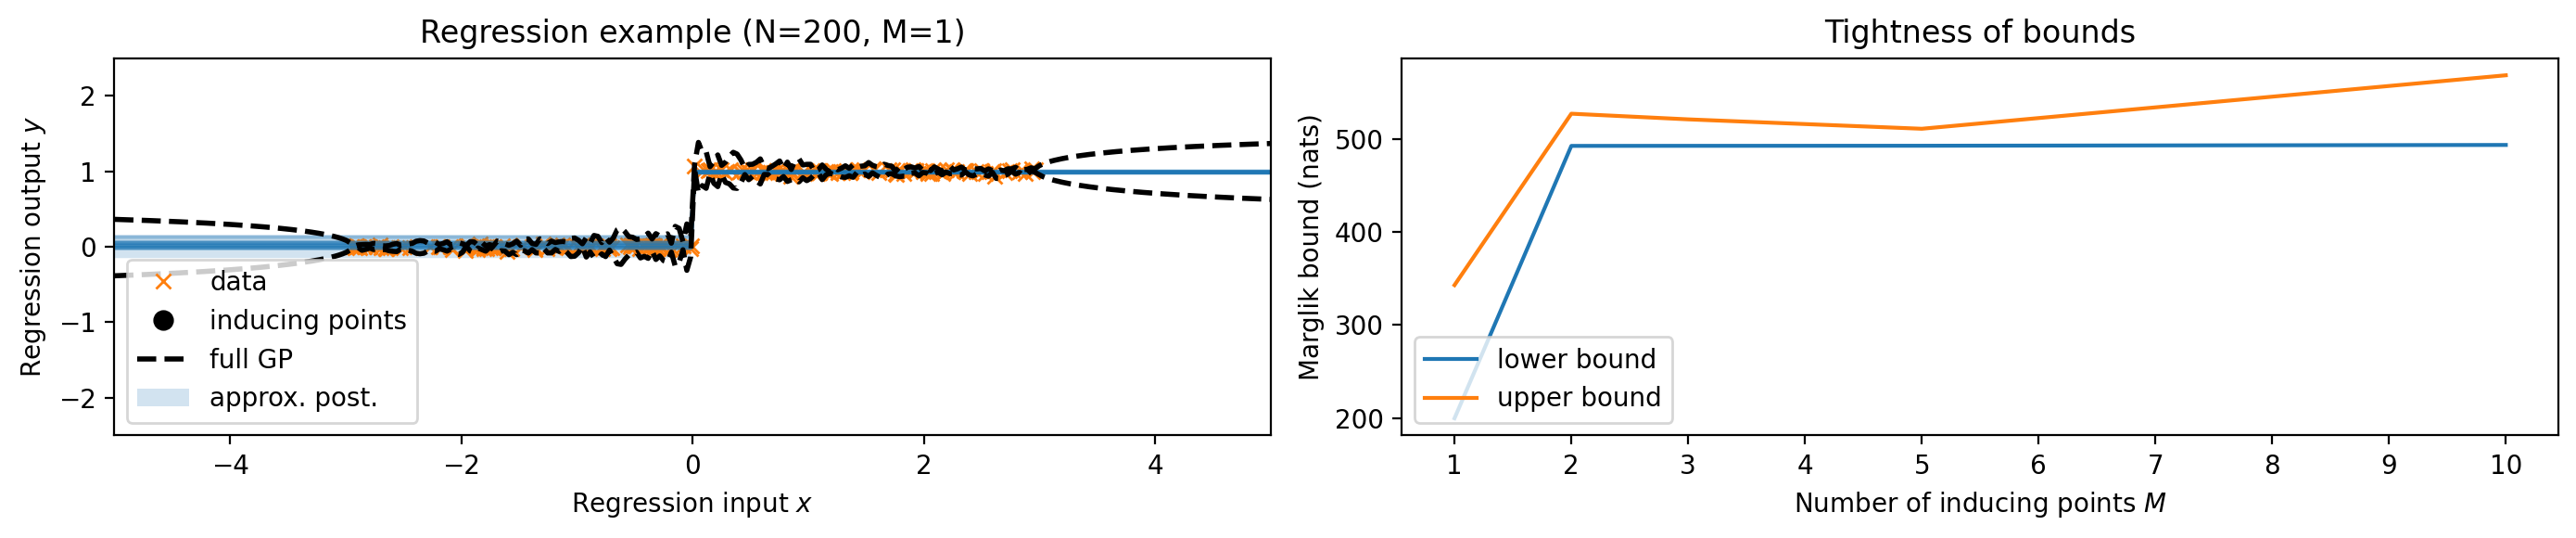

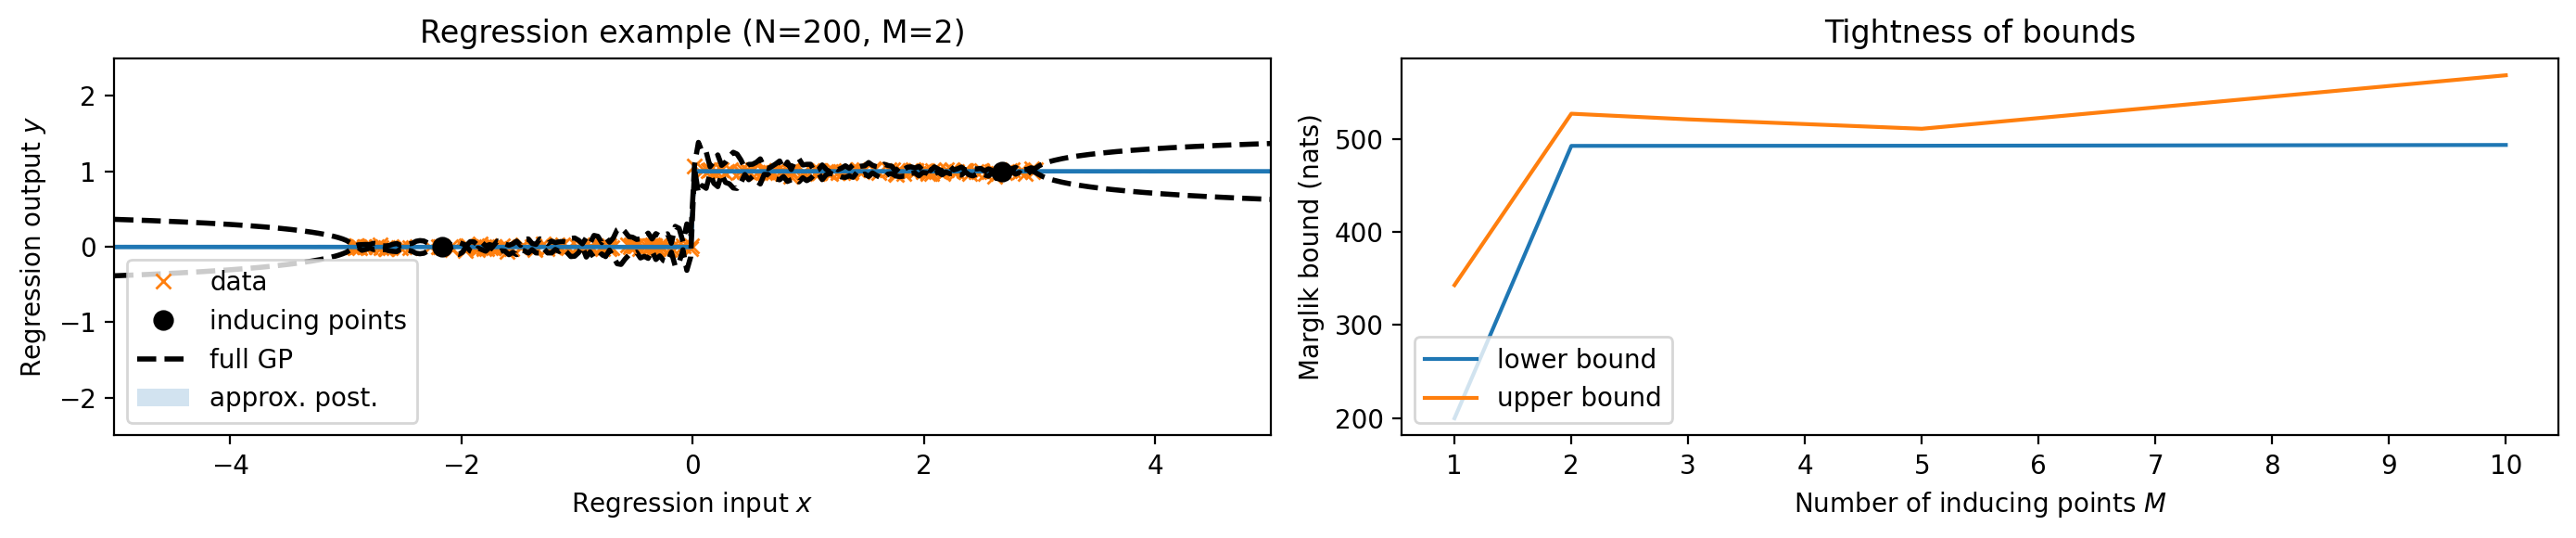

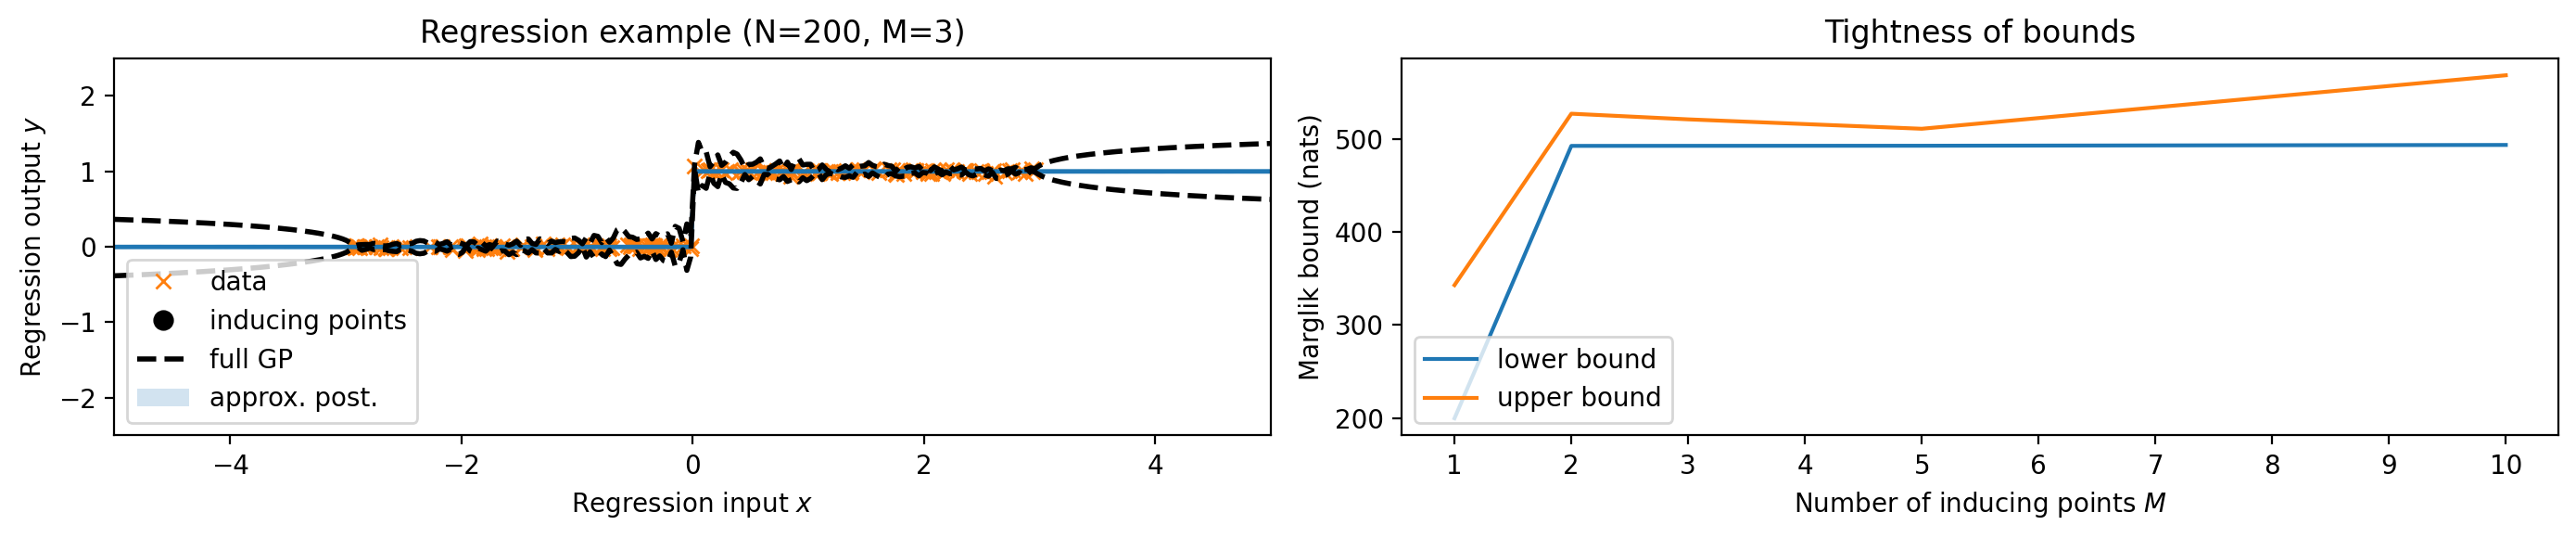

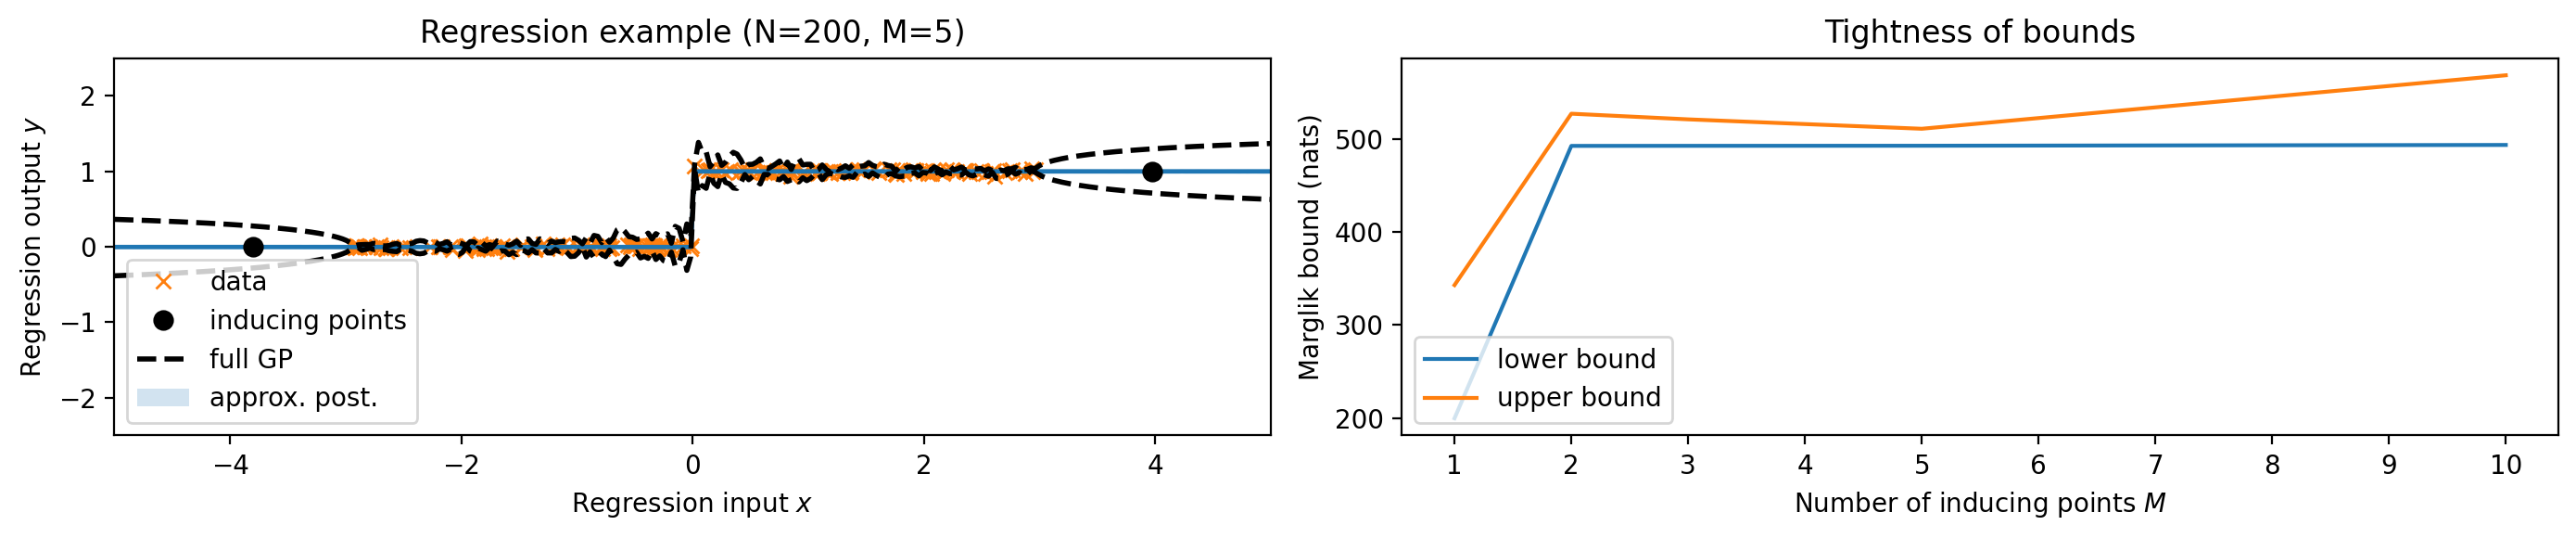

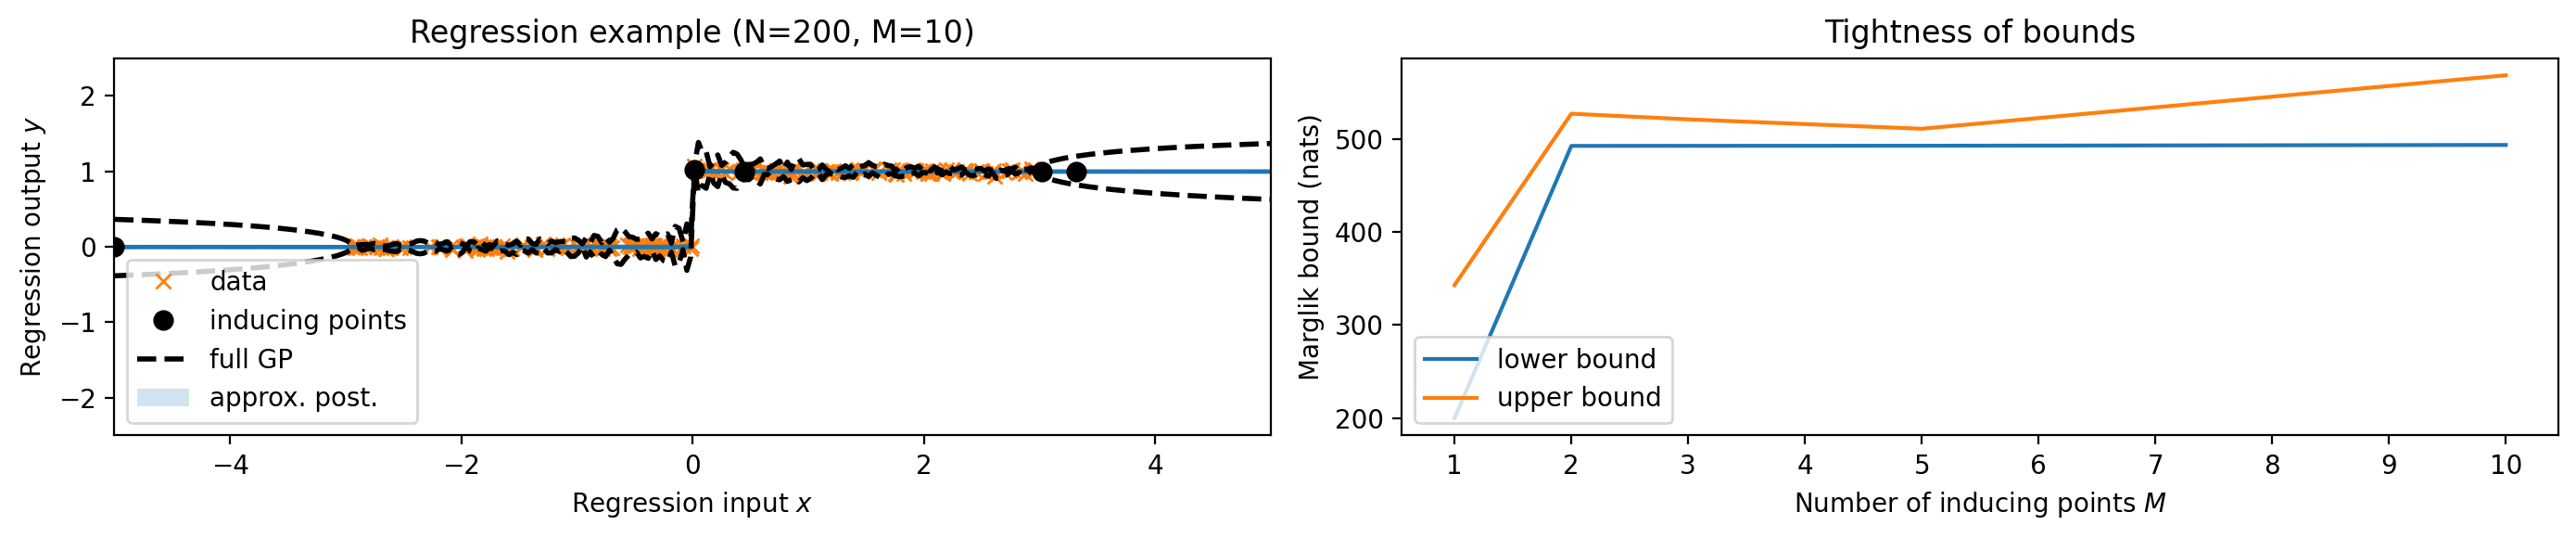

In [26]:
for i, M in enumerate(Ms):
    fig, axs = plt.subplots(1, 2, figsize=(14, 3), dpi=200)
    plotting.plot_1d_model(models[i], pX=pX, plot_var='f', plot_samples=True, plot_mean=False, ax=axs[0])
    
    axs[0].plot(pX, full_pY + 2.0 * full_pYv ** 0.5, color='k', linestyle='--', linewidth=2.0)
    axs[0].plot(pX, full_pY - 2.0 * full_pYv ** 0.5, color='k', linestyle='--', linewidth=2.0, label="full GP")
    axs[0].set_xlim(-5, 5)
    axs[0].set_ylim(-2.5, 2.5)
    axs[0].set_xlabel("Regression input $x$")
    axs[0].set_ylabel("Regression output $y$")
    axs[0].set_title(f"Regression example (N={len(X)}, M={M})")
    axs[0].legend(loc='lower left')
    
    axs[1].plot(Ms, lbs, label='lower bound')
    axs[1].plot(Ms, ubs, label='upper bound')
    # axs[1].axvline(Ms[i], color='C3')
    axs[1].set_title("Tightness of bounds")
    axs[1].set_ylabel("Marglik bound (nats)")
    axs[1].set_xlabel("Number of inducing points $M$")
    # axs[1].axhline(lml, color='k', linestyle='--', label="marg. lik.", linewidth=2.0)
    axs[1].legend(loc='lower left')
    axs[1].xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    
    if len(axs) > 2:
        axs[2].plot(Ms, lengthscales)
        ax2 = axs[2].twinx()
        ax2.plot(Ms, noise_stds, 'C1')
        ax2.set_ylabel("noise std", color="C1")
        axs[2].set_ylabel("lengthscale", color="C0")
        axs[2].set_xlabel("Number of inducing points $M$")
        axs[2].set_title("Hyperparameters")
        axs[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
        
    plt.tight_layout()
    fig.savefig(f"sgpr-tightness-{i+1}.png")